In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df_train = pd.read_csv('/kaggle/input/house-price-dataset/train.csv')
df_test = pd.read_csv('/kaggle/input/house-price-dataset/test.csv')

df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [48]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [49]:
df_train.shape


(1460, 81)

In [50]:

df_test.shape

(1459, 80)

In [51]:
#This is to display all the columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_columns',None)
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [52]:
df_train.shape

(1460, 81)

In [53]:
df_train.duplicated().sum()

0

In [54]:
df_train.isnull().sum().tolist()

[0,
 0,
 0,
 259,
 0,
 0,
 1369,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 872,
 8,
 0,
 0,
 0,
 37,
 37,
 38,
 37,
 0,
 38,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 690,
 81,
 81,
 81,
 0,
 0,
 81,
 81,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1453,
 1179,
 1406,
 0,
 0,
 0,
 0,
 0,
 0]

In [55]:
df_train.LotFrontage.mean()

70.04995836802665

In [56]:
df_train.LotFrontage = df_train.LotFrontage.fillna(70.04995836802665)
df_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [57]:
df_train.Alley.mode()

0    Grvl
Name: Alley, dtype: object

In [58]:
df_train.Alley = df_train.Alley.fillna('Grvl')
df_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [59]:
df_train.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL    65.000000     8450   Pave  Grvl      Reg   
1   2          20       RL    80.000000     9600   Pave  Grvl      Reg   
2   3          60       RL    68.000000    11250   Pave  Grvl      IR1   
3   4          70       RL    60.000000     9550   Pave  Grvl      IR1   
4   5          60       RL    84.000000    14260   Pave  Grvl      IR1   
5   6          50       RL    85.000000    14115   Pave  Grvl      IR1   
6   7          20       RL    75.000000    10084   Pave  Grvl      Reg   
7   8          60       RL    70.049958    10382   Pave  Grvl      IR1   
8   9          50       RM    51.000000     6120   Pave  Grvl      Reg   
9  10         190       RL    50.000000     7420   Pave  Grvl      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd        NaN   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng        NaN   
9          1950     Gable  CompShg     MetalSd     MetalSd        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

In [60]:
df_train.MasVnrType.mode()

0    BrkFace
Name: MasVnrType, dtype: object

In [61]:
df_train.MasVnrType = df_train.MasVnrType.fillna('BrkFace')
df_train.isnull().sum().tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8,
 0,
 0,
 0,
 37,
 37,
 38,
 37,
 0,
 38,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 690,
 81,
 81,
 81,
 0,
 0,
 81,
 81,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1453,
 1179,
 1406,
 0,
 0,
 0,
 0,
 0,
 0]

In [62]:
df_train.head(25)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL    65.000000     8450   Pave  Grvl      Reg   
1    2          20       RL    80.000000     9600   Pave  Grvl      Reg   
2    3          60       RL    68.000000    11250   Pave  Grvl      IR1   
3    4          70       RL    60.000000     9550   Pave  Grvl      IR1   
4    5          60       RL    84.000000    14260   Pave  Grvl      IR1   
5    6          50       RL    85.000000    14115   Pave  Grvl      IR1   
6    7          20       RL    75.000000    10084   Pave  Grvl      Reg   
7    8          60       RL    70.049958    10382   Pave  Grvl      IR1   
8    9          50       RM    51.000000     6120   Pave  Grvl      Reg   
9   10         190       RL    50.000000     7420   Pave  Grvl      Reg   
10  11          20       RL    70.000000    11200   Pave  Grvl      Reg   
11  12          60       RL    85.000000    11924   Pave  Grvl      IR1   
12  13          20       RL    70.049958    12968   Pave  Grvl      IR2   
13  14          20       RL    91.000000    10652   Pave  Grvl      IR1   
14  15          20       RL    70.049958    10920   Pave  Grvl      IR1   
15  16          45       RM    51.000000     6120   Pave  Grvl      Reg   
16  17          20       RL    70.049958    11241   Pave  Grvl      IR1   
17  18          90       RL    72.000000    10791   Pave  Grvl      Reg   
18  19          20       RL    66.000000    13695   Pave  Grvl      Reg   
19  20          20       RL    70.000000     7560   Pave  Grvl      Reg   
20  21          60       RL   101.000000    14215   Pave  Grvl      IR1   
21  22          45       RM    57.000000     7449   Pave  Grvl      Reg   
22  23          20       RL    75.000000     9742   Pave  Grvl      Reg   
23  24         120       RM    44.000000     4224   Pave  Grvl      Reg   
24  25          20       RL    70.049958     8246   Pave  Grvl      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7          Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9          Lvl    AllPub    Corner       Gtl      BrkSide     Artery   
10         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
11         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
12         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
13         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
14         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
15         Lvl    AllPub    Corner       Gtl      BrkSide       Norm   
16         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
17         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
18         Lvl    AllPub    Inside       Gtl      SawyerW       RRAe   
19         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
20         Lvl    AllPub    Corner       Gtl      NridgHt       Norm   
21         Bnk    AllPub    Inside       Gtl       IDOTRR       Norm   
22         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
23         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
24         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     2Story            7            5       2003   
1        Norm     1Fam     1Stor

In [63]:
df_train.FireplaceQu.mode()

0    Gd
Name: FireplaceQu, dtype: object

In [64]:
df_train.FireplaceQu = df_train.FireplaceQu.fillna('Gd')
df_train.isnull().sum().tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8,
 0,
 0,
 0,
 37,
 37,
 38,
 37,
 0,
 38,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 81,
 81,
 81,
 0,
 0,
 81,
 81,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1453,
 1179,
 1406,
 0,
 0,
 0,
 0,
 0,
 0]

In [65]:
df_train.MiscFeature.mode()

0    Shed
Name: MiscFeature, dtype: object

In [66]:
df_train.Fence.mode()

0    MnPrv
Name: Fence, dtype: object

In [67]:
df_train.PoolQC.mode()

0    Gd
Name: PoolQC, dtype: object

In [68]:
df_train.MiscFeature = df_train.MiscFeature.fillna('Shed')
df_train.Fence = df_train.Fence.fillna('MnPrv')
df_train.PoolQC = df_train.PoolQC.fillna('Gd')
df_train.isnull().sum().tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8,
 0,
 0,
 0,
 37,
 37,
 38,
 37,
 0,
 38,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 81,
 81,
 81,
 0,
 0,
 81,
 81,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8,
 0,
 0,
 0,
 37,
 37,
 38,
 37,
 0,
 38,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 81,
 81,
 81,
 0,
 0,
 81,
 81,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
df_train.shape

(1460, 81)

In [70]:
df_train.head(30)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL    65.000000     8450   Pave  Grvl      Reg   
1    2          20       RL    80.000000     9600   Pave  Grvl      Reg   
2    3          60       RL    68.000000    11250   Pave  Grvl      IR1   
3    4          70       RL    60.000000     9550   Pave  Grvl      IR1   
4    5          60       RL    84.000000    14260   Pave  Grvl      IR1   
5    6          50       RL    85.000000    14115   Pave  Grvl      IR1   
6    7          20       RL    75.000000    10084   Pave  Grvl      Reg   
7    8          60       RL    70.049958    10382   Pave  Grvl      IR1   
8    9          50       RM    51.000000     6120   Pave  Grvl      Reg   
9   10         190       RL    50.000000     7420   Pave  Grvl      Reg   
10  11          20       RL    70.000000    11200   Pave  Grvl      Reg   
11  12          60       RL    85.000000    11924   Pave  Grvl      IR1   
12  13          20       RL    70.049958    12968   Pave  Grvl      IR2   
13  14          20       RL    91.000000    10652   Pave  Grvl      IR1   
14  15          20       RL    70.049958    10920   Pave  Grvl      IR1   
15  16          45       RM    51.000000     6120   Pave  Grvl      Reg   
16  17          20       RL    70.049958    11241   Pave  Grvl      IR1   
17  18          90       RL    72.000000    10791   Pave  Grvl      Reg   
18  19          20       RL    66.000000    13695   Pave  Grvl      Reg   
19  20          20       RL    70.000000     7560   Pave  Grvl      Reg   
20  21          60       RL   101.000000    14215   Pave  Grvl      IR1   
21  22          45       RM    57.000000     7449   Pave  Grvl      Reg   
22  23          20       RL    75.000000     9742   Pave  Grvl      Reg   
23  24         120       RM    44.000000     4224   Pave  Grvl      Reg   
24  25          20       RL    70.049958     8246   Pave  Grvl      IR1   
25  26          20       RL   110.000000    14230   Pave  Grvl      Reg   
26  27          20       RL    60.000000     7200   Pave  Grvl      Reg   
27  28          20       RL    98.000000    11478   Pave  Grvl      Reg   
28  29          20       RL    47.000000    16321   Pave  Grvl      IR1   
29  30          30       RM    60.000000     6324   Pave  Grvl      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7          Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9          Lvl    AllPub    Corner       Gtl      BrkSide     Artery   
10         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
11         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
12         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
13         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
14         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
15         Lvl    AllPub    Corner       Gtl      BrkSide       Norm   
16         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
17         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
18         Lvl    AllPub    Inside       Gtl      SawyerW       RRAe   
19         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
20         Lvl    AllPub    Corner       Gtl      NridgHt       Norm   
21         Bnk    AllPub    Inside       Gtl       IDOTRR       Norm   
22         Lvl    AllP

In [71]:
df_train.BsmtQual.mode()

0    TA
Name: BsmtQual, dtype: object

In [72]:
df_train.BsmtCond.mode()

0    TA
Name: BsmtCond, dtype: object

In [74]:
df_train.BsmtQual = df_train.BsmtQual.fillna('TA')
df_train.BsmtCond = df_train.BsmtCond.fillna('TA')
df_train.isnull().sum().tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8,
 0,
 0,
 0,
 0,
 0,
 38,
 37,
 0,
 38,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 81,
 81,
 81,
 0,
 0,
 81,
 81,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [75]:
df_train.BsmtExposure.mode()

0    No
Name: BsmtExposure, dtype: object

In [76]:
df_train.BsmtFinType1.mode()

0    Unf
Name: BsmtFinType1, dtype: object

In [77]:
df_train.BsmtFinType2.mode()

0    Unf
Name: BsmtFinType2, dtype: object

In [79]:
df_train.BsmtExposure = df_train.BsmtExposure.fillna('No')
df_train.BsmtFinType1 = df_train.BsmtFinType1.fillna('Unf')
df_train.BsmtFinType2 = df_train.BsmtFinType2.fillna('Unf')
df_train.isnull().sum().tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 81,
 81,
 81,
 0,
 0,
 81,
 81,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [80]:
df_train.head(35)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL    65.000000     8450   Pave  Grvl      Reg   
1    2          20       RL    80.000000     9600   Pave  Grvl      Reg   
2    3          60       RL    68.000000    11250   Pave  Grvl      IR1   
3    4          70       RL    60.000000     9550   Pave  Grvl      IR1   
4    5          60       RL    84.000000    14260   Pave  Grvl      IR1   
5    6          50       RL    85.000000    14115   Pave  Grvl      IR1   
6    7          20       RL    75.000000    10084   Pave  Grvl      Reg   
7    8          60       RL    70.049958    10382   Pave  Grvl      IR1   
8    9          50       RM    51.000000     6120   Pave  Grvl      Reg   
9   10         190       RL    50.000000     7420   Pave  Grvl      Reg   
10  11          20       RL    70.000000    11200   Pave  Grvl      Reg   
11  12          60       RL    85.000000    11924   Pave  Grvl      IR1   
12  13          20       RL    70.049958    12968   Pave  Grvl      IR2   
13  14          20       RL    91.000000    10652   Pave  Grvl      IR1   
14  15          20       RL    70.049958    10920   Pave  Grvl      IR1   
15  16          45       RM    51.000000     6120   Pave  Grvl      Reg   
16  17          20       RL    70.049958    11241   Pave  Grvl      IR1   
17  18          90       RL    72.000000    10791   Pave  Grvl      Reg   
18  19          20       RL    66.000000    13695   Pave  Grvl      Reg   
19  20          20       RL    70.000000     7560   Pave  Grvl      Reg   
20  21          60       RL   101.000000    14215   Pave  Grvl      IR1   
21  22          45       RM    57.000000     7449   Pave  Grvl      Reg   
22  23          20       RL    75.000000     9742   Pave  Grvl      Reg   
23  24         120       RM    44.000000     4224   Pave  Grvl      Reg   
24  25          20       RL    70.049958     8246   Pave  Grvl      IR1   
25  26          20       RL   110.000000    14230   Pave  Grvl      Reg   
26  27          20       RL    60.000000     7200   Pave  Grvl      Reg   
27  28          20       RL    98.000000    11478   Pave  Grvl      Reg   
28  29          20       RL    47.000000    16321   Pave  Grvl      IR1   
29  30          30       RM    60.000000     6324   Pave  Grvl      IR1   
30  31          70  C (all)    50.000000     8500   Pave  Pave      Reg   
31  32          20       RL    70.049958     8544   Pave  Grvl      IR1   
32  33          20       RL    85.000000    11049   Pave  Grvl      Reg   
33  34          20       RL    70.000000    10552   Pave  Grvl      IR1   
34  35         120       RL    60.000000     7313   Pave  Grvl      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7          Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9          Lvl    AllPub    Corner       Gtl      BrkSide     Artery   
10         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
11         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
12         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
13         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
14         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
15         Lvl    AllPub    Corner       Gtl      BrkSide       Norm   
16         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
17     

In [84]:
df_train.isnull().sum().tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 81,
 81,
 81,
 0,
 0,
 81,
 81,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [85]:
df_train.tail(30)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1430  1431          60       RL    60.000000    21930   Pave  Grvl      IR3   
1431  1432         120       RL    70.049958     4928   Pave  Grvl      IR1   
1432  1433          30       RL    60.000000    10800   Pave  Grvl      Reg   
1433  1434          60       RL    93.000000    10261   Pave  Grvl      IR1   
1434  1435          20       RL    80.000000    17400   Pave  Grvl      Reg   
1435  1436          20       RL    80.000000     8400   Pave  Grvl      Reg   
1436  1437          20       RL    60.000000     9000   Pave  Grvl      Reg   
1437  1438          20       RL    96.000000    12444   Pave  Grvl      Reg   
1438  1439          20       RM    90.000000     7407   Pave  Grvl      Reg   
1439  1440          60       RL    80.000000    11584   Pave  Grvl      Reg   
1440  1441          70       RL    79.000000    11526   Pave  Grvl      IR1   
1441  1442         120       RM    70.049958     4426   Pave  Grvl      Reg   
1442  1443          60       FV    85.000000    11003   Pave  Grvl      Reg   
1443  1444          30       RL    70.049958     8854   Pave  Grvl      Reg   
1444  1445          20       RL    63.000000     8500   Pave  Grvl      Reg   
1445  1446          85       RL    70.000000     8400   Pave  Grvl      Reg   
1446  1447          20       RL    70.049958    26142   Pave  Grvl      IR1   
1447  1448          60       RL    80.000000    10000   Pave  Grvl      Reg   
1448  1449          50       RL    70.000000    11767   Pave  Grvl      Reg   
1449  1450         180       RM    21.000000     1533   Pave  Grvl      Reg   
1450  1451          90       RL    60.000000     9000   Pave  Grvl      Reg   
1451  1452          20       RL    78.000000     9262   Pave  Grvl      Reg   
1452  1453         180       RM    35.000000     3675   Pave  Grvl      Reg   
1453  1454          20       RL    90.000000    17217   Pave  Grvl      Reg   
1454  1455          20       FV    62.000000     7500   Pave  Pave      Reg   
1455  1456          60       RL    62.000000     7917   Pave  Grvl      Reg   
1456  1457          20       RL    85.000000    13175   Pave  Grvl      Reg   
1457  1458          70       RL    66.000000     9042   Pave  Grvl      Reg   
1458  1459          20       RL    68.000000     9717   Pave  Grvl      Reg   
1459  1460          20       RL    75.000000     9937   Pave  Grvl      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1430         Lvl    AllPub    Inside       Gtl      Gilbert       RRAn   
1431         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1432         Lvl    AllPub    Inside       Gtl      OldTown       Norm   
1433         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1434         Low    AllPub    Inside       Mod      Mitchel       Norm   
1435         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1436         Lvl    AllPub       FR2       Gtl        NAmes       Norm   
1437         Lvl    AllPub       FR2       Gtl      NridgHt       Norm   
1438         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
1439         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1440         Bnk    AllPub    Inside       Mod      Crawfor       Norm   
1441         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1442         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1443         Lvl    AllPub    Inside       Gtl      BrkSide       Norm   
1444         Lvl    AllPub       FR2       Gtl      CollgCr       Norm   
1445         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1446         Lvl    AllPub   CulDSac       Gtl      Mitchel       Norm   
1447         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1448         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
1449         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1450

In [87]:
df_train.GarageYrBlt.mode()

0    2005.0
Name: GarageYrBlt, dtype: float64

In [86]:
df_train.GarageType.mode()

0    Attchd
Name: GarageType, dtype: object

In [88]:
df_train.GarageFinish.mode()

0    Unf
Name: GarageFinish, dtype: object

In [89]:
df_train.GarageQual.mode()

0    TA
Name: GarageQual, dtype: object

In [90]:
df_train.GarageCond.mode()

0    TA
Name: GarageCond, dtype: object

In [91]:
df_train.GarageType = df_train.GarageType.fillna('Attchd')
df_train.GarageYrBlt = df_train.GarageYrBlt.fillna(2005.0)
df_train.GarageFinish = df_train.GarageFinish.fillna('Unf')
df_train.GarageQual = df_train.GarageQual.fillna('TA')
df_train.GarageCond = df_train.GarageCond.fillna('TA')

df_train.isnull().sum().tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [94]:
df_train.shape

(1451, 81)

In [93]:
df_train = df_train.dropna()
df_train.isnull().sum().tolist()


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [96]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   int64  
 2   MSZoning       1451 non-null   object 
 3   LotFrontage    1451 non-null   float64
 4   LotArea        1451 non-null   int64  
 5   Street         1451 non-null   object 
 6   Alley          1451 non-null   object 
 7   LotShape       1451 non-null   object 
 8   LandContour    1451 non-null   object 
 9   Utilities      1451 non-null   object 
 10  LotConfig      1451 non-null   object 
 11  LandSlope      1451 non-null   object 
 12  Neighborhood   1451 non-null   object 
 13  Condition1     1451 non-null   object 
 14  Condition2     1451 non-null   object 
 15  BldgType       1451 non-null   object 
 16  HouseStyle     1451 non-null   object 
 17  OverallQual    1451 non-null   int64  
 18  OverallCond  

In [100]:
df_train.MSZoning = df_train.MSZoning.replace(['RL', 'RM', 'C (all)', 'FV', 'RH'],[0,1,2,3,4])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   int64  
 2   MSZoning       1451 non-null   int64  
 3   LotFrontage    1451 non-null   float64
 4   LotArea        1451 non-null   int64  
 5   Street         1451 non-null   object 
 6   Alley          1451 non-null   object 
 7   LotShape       1451 non-null   object 
 8   LandContour    1451 non-null   object 
 9   Utilities      1451 non-null   object 
 10  LotConfig      1451 non-null   object 
 11  LandSlope      1451 non-null   object 
 12  Neighborhood   1451 non-null   object 
 13  Condition1     1451 non-null   object 
 14  Condition2     1451 non-null   object 
 15  BldgType       1451 non-null   object 
 16  HouseStyle     1451 non-null   object 
 17  OverallQual    1451 non-null   int64  
 18  OverallCond  

In [103]:
df_train.Street = df_train.Street.replace(['Pave', 'Grvl'],[1,0])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   int64  
 2   MSZoning       1451 non-null   int64  
 3   LotFrontage    1451 non-null   float64
 4   LotArea        1451 non-null   int64  
 5   Street         1451 non-null   int64  
 6   Alley          1451 non-null   object 
 7   LotShape       1451 non-null   object 
 8   LandContour    1451 non-null   object 
 9   Utilities      1451 non-null   object 
 10  LotConfig      1451 non-null   object 
 11  LandSlope      1451 non-null   object 
 12  Neighborhood   1451 non-null   object 
 13  Condition1     1451 non-null   object 
 14  Condition2     1451 non-null   object 
 15  BldgType       1451 non-null   object 
 16  HouseStyle     1451 non-null   object 
 17  OverallQual    1451 non-null   int64  
 18  OverallCond  

In [105]:
df_train.LotShape.unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [106]:
df_train.LandContour.unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [107]:
df_train.Utilities.unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [108]:
df_train.LotConfig.unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [109]:
df_train.LandSlope.unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [110]:
df_train.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [112]:
df_train.Condition2.unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)

In [120]:


df_train.Alley = df_train.Alley.replace(['Grvl', 'Pave'],[0,1])

df_train.LotShape = df_train.LotShape.replace(['Reg', 'IR1', 'IR2', 'IR3'],[0,1,2,3])

df_train.LandContour = df_train.LandContour.replace(['Lvl', 'Bnk', 'Low', 'HLS'],[3,2,0,1])

df_train.Utilities = df_train.Utilities.replace(['AllPub', 'NoSeWa'],[1,0])

df_train.LotConfig = df_train.LotConfig.replace(['Inside','FR2','Corner','CulDSac', 'FR3'],[0,3,4,2,1])

df_train.LandSlope = df_train.LandSlope.replace(['Gtl', 'Mod', 'Sev'],[0,1,2])

df_train.Neighborhood = df_train.Neighborhood.replace(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])     

df_train.Condition1 = df_train.Condition1.replace(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'],[0,1,2,3,4,5,6,7,8])

df_train.Condition2 = df_train.Condition2.replace(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],[0,1,2,3,4,5,6,7])

df_train.info()
                                        

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   int64  
 2   MSZoning       1451 non-null   int64  
 3   LotFrontage    1451 non-null   float64
 4   LotArea        1451 non-null   int64  
 5   Street         1451 non-null   int64  
 6   Alley          1451 non-null   int64  
 7   LotShape       1451 non-null   int64  
 8   LandContour    1451 non-null   int64  
 9   Utilities      1451 non-null   int64  
 10  LotConfig      1451 non-null   int64  
 11  LandSlope      1451 non-null   int64  
 12  Neighborhood   1451 non-null   int64  
 13  Condition1     1451 non-null   int64  
 14  Condition2     1451 non-null   int64  
 15  BldgType       1451 non-null   object 
 16  HouseStyle     1451 non-null   object 
 17  OverallQual    1451 non-null   int64  
 18  OverallCond  

In [121]:
df_train.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         0         65.0     8450       1      0         0   
1   2          20         0         80.0     9600       1      0         0   
2   3          60         0         68.0    11250       1      0         1   
3   4          70         0         60.0     9550       1      0         1   
4   5          60         0         84.0    14260       1      0         1   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          1          0          0             0           0   
1            3          1          3          0             1           1   
2            3          1          0          0             0           0   
3            3          1          4          0             2           0   
4            3          1          3          0             3           0   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           0     1Fam     2Story            7            5       2003   
1           0     1Fam     1Story            6            8       1976   
2           0     1Fam     2Story            7            5       2001   
3           0     1Fam     2Story            7            5       1915   
4           0     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd    BrkFace   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng    BrkFace   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          Gd   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ 

In [122]:
df_train = df_train.drop(['Id'],axis=1)
df_train.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0          60         0         65.0     8450       1      0         0   
1          20         0         80.0     9600       1      0         0   
2          60         0         68.0    11250       1      0         1   
3          70         0         60.0     9550       1      0         1   
4          60         0         84.0    14260       1      0         1   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          1          0          0             0           0   
1            3          1          3          0             1           1   
2            3          1          0          0             0           0   
3            3          1          4          0             2           0   
4            3          1          3          0             3           0   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           0     1Fam     2Story            7            5       2003   
1           0     1Fam     1Story            6            8       1976   
2           0     1Fam     2Story            7            5       2001   
3           0     1Fam     2Story            7            5       1915   
4           0     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd    BrkFace   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng    BrkFace   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          Gd   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA 

In [123]:
df_train.BldgType.unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [124]:
df_train.HouseStyle.unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [126]:
df_train.BldgType = df_train.BldgType.replace(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'],[0,1,2,3,4])
df_train.HouseStyle = df_train.HouseStyle.replace(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'],[0,1,2,3,4,5,6,7])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   int64  
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   int64  
 5   Alley          1451 non-null   int64  
 6   LotShape       1451 non-null   int64  
 7   LandContour    1451 non-null   int64  
 8   Utilities      1451 non-null   int64  
 9   LotConfig      1451 non-null   int64  
 10  LandSlope      1451 non-null   int64  
 11  Neighborhood   1451 non-null   int64  
 12  Condition1     1451 non-null   int64  
 13  Condition2     1451 non-null   int64  
 14  BldgType       1451 non-null   int64  
 15  HouseStyle     1451 non-null   int64  
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int64  
 18  YearBuilt    

In [130]:
df_train.Exterior2nd.unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Other', 'Stone', 'CBlock'], dtype=object)

In [127]:
df_train.RoofStyle.unique()

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

In [128]:
df_train.RoofMatl.unique()

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'], dtype=object)

In [132]:
df_train.MasVnrType.unique()

array(['BrkFace', 'Stone', 'BrkCmn'], dtype=object)

In [135]:
df_train.RoofStyle = df_train.RoofStyle.replace(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'],[5,4,3,2,1,0])
df_train.RoofMatl = df_train.RoofMatl.replace(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'],[0,1,2,3,4,5,6,7])
df_train.Exterior1st = df_train.Exterior1st.replace(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
df_train.Exterior2nd = df_train.Exterior2nd.replace(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Other', 'Stone', 'CBlock'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
df_train.MasVnrType = df_train.MasVnrType.replace(['BrkFace', 'Stone', 'BrkCmn'],[0,1,2])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   int64  
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   int64  
 5   Alley          1451 non-null   int64  
 6   LotShape       1451 non-null   int64  
 7   LandContour    1451 non-null   int64  
 8   Utilities      1451 non-null   int64  
 9   LotConfig      1451 non-null   int64  
 10  LandSlope      1451 non-null   int64  
 11  Neighborhood   1451 non-null   int64  
 12  Condition1     1451 non-null   int64  
 13  Condition2     1451 non-null   int64  
 14  BldgType       1451 non-null   int64  
 15  HouseStyle     1451 non-null   int64  
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int64  
 18  YearBuilt    

In [136]:
df_train.ExterQual.unique()


array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [137]:
df_train.ExterCond.unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [138]:
df_train.Foundation.unique()

array(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], dtype=object)

In [139]:
df_train.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [140]:
df_train.BsmtCond.unique()

array(['TA', 'Gd', 'Fa', 'Po'], dtype=object)

In [141]:
df_train.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av'], dtype=object)

In [142]:
df_train.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'LwQ'], dtype=object)

In [144]:
df_train.ExterQual = df_train.ExterQual.replace(['Gd', 'TA', 'Ex', 'Fa'],[0,1,2,3])
df_train.ExterCond = df_train.ExterCond.replace(['TA', 'Gd', 'Fa', 'Po', 'Ex'],[0,1,2,3,4])
df_train.Foundation = df_train.Foundation.replace(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'],[0,1,2,3,4,5])
df_train.BsmtQual = df_train.BsmtQual.replace(['Gd', 'TA', 'Ex', 'Fa'],[0,1,2,3])
df_train.BsmtCond = df_train.BsmtCond.replace(['TA', 'Gd', 'Fa', 'Po'],[0,1,2,3])
df_train.BsmtExposure = df_train.BsmtExposure.replace(['No', 'Gd', 'Mn', 'Av'],[0,1,2,3])
df_train.BsmtFinType1 = df_train.BsmtFinType1.replace(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'LwQ'],[0,1,2,3,4,5])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   int64  
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   int64  
 5   Alley          1451 non-null   int64  
 6   LotShape       1451 non-null   int64  
 7   LandContour    1451 non-null   int64  
 8   Utilities      1451 non-null   int64  
 9   LotConfig      1451 non-null   int64  
 10  LandSlope      1451 non-null   int64  
 11  Neighborhood   1451 non-null   int64  
 12  Condition1     1451 non-null   int64  
 13  Condition2     1451 non-null   int64  
 14  BldgType       1451 non-null   int64  
 15  HouseStyle     1451 non-null   int64  
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int64  
 18  YearBuilt    

In [146]:
df_train.BsmtFinType2 = df_train.BsmtFinType2.replace(['Unf', 'BLQ', 'ALQ', 'Rec', 'LwQ', 'GLQ'],[0,1,2,3,4,5])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   int64  
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   int64  
 5   Alley          1451 non-null   int64  
 6   LotShape       1451 non-null   int64  
 7   LandContour    1451 non-null   int64  
 8   Utilities      1451 non-null   int64  
 9   LotConfig      1451 non-null   int64  
 10  LandSlope      1451 non-null   int64  
 11  Neighborhood   1451 non-null   int64  
 12  Condition1     1451 non-null   int64  
 13  Condition2     1451 non-null   int64  
 14  BldgType       1451 non-null   int64  
 15  HouseStyle     1451 non-null   int64  
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int64  
 18  YearBuilt    

 38  Heating        1451 non-null   object 
 
 39  HeatingQC      1451 non-null   object 
 
 40  CentralAir     1451 non-null   object 
 
 41  Electrical     1451 non-null   object

In [150]:
df_train.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [153]:
df_train.Heating = df_train.Heating.replace(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'],[0,1,2,3,4,6])
df_train.HeatingQC = df_train.HeatingQC.replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'],[0,1,2,3,4])
df_train.CentralAir = df_train.CentralAir.replace(['Y', 'N'],[1,0])
df_train.Electrical = df_train.Electrical.replace(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'],[0,1,2,3,4])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   int64  
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   int64  
 5   Alley          1451 non-null   int64  
 6   LotShape       1451 non-null   int64  
 7   LandContour    1451 non-null   int64  
 8   Utilities      1451 non-null   int64  
 9   LotConfig      1451 non-null   int64  
 10  LandSlope      1451 non-null   int64  
 11  Neighborhood   1451 non-null   int64  
 12  Condition1     1451 non-null   int64  
 13  Condition2     1451 non-null   int64  
 14  BldgType       1451 non-null   int64  
 15  HouseStyle     1451 non-null   int64  
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int64  
 18  YearBuilt    

In [156]:
df_train.KitchenQual = df_train.KitchenQual.replace(['Gd', 'TA', 'Ex', 'Fa'],[0,1,2,3])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   int64  
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   int64  
 5   Alley          1451 non-null   int64  
 6   LotShape       1451 non-null   int64  
 7   LandContour    1451 non-null   int64  
 8   Utilities      1451 non-null   int64  
 9   LotConfig      1451 non-null   int64  
 10  LandSlope      1451 non-null   int64  
 11  Neighborhood   1451 non-null   int64  
 12  Condition1     1451 non-null   int64  
 13  Condition2     1451 non-null   int64  
 14  BldgType       1451 non-null   int64  
 15  HouseStyle     1451 non-null   int64  
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int64  
 18  YearBuilt    

In [157]:
print(df_train.FireplaceQu.unique())
print(df_train.GarageType.unique())

['Gd' 'TA' 'Fa' 'Ex' 'Po']
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'Basment' '2Types']


In [159]:
df_train.FireplaceQu = df_train.FireplaceQu.replace(['Gd', 'TA', 'Fa', 'Ex','Po'],[0,1,2,3,4])
df_train.GarageType = df_train.GarageType.replace(['Attchd' ,'Detchd', 'BuiltIn', 'CarPort', 'Basment', '2Types'],[0,1,2,3,4,5])

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   int64  
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   int64  
 5   Alley          1451 non-null   int64  
 6   LotShape       1451 non-null   int64  
 7   LandContour    1451 non-null   int64  
 8   Utilities      1451 non-null   int64  
 9   LotConfig      1451 non-null   int64  
 10  LandSlope      1451 non-null   int64  
 11  Neighborhood   1451 non-null   int64  
 12  Condition1     1451 non-null   int64  
 13  Condition2     1451 non-null   int64  
 14  BldgType       1451 non-null   int64  
 15  HouseStyle     1451 non-null   int64  
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int64  
 18  YearBuilt    

In [161]:
df_train.Functional = df_train.Functional.replace(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'],[0,1,2,3,4,5,6])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   int64  
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   int64  
 5   Alley          1451 non-null   int64  
 6   LotShape       1451 non-null   int64  
 7   LandContour    1451 non-null   int64  
 8   Utilities      1451 non-null   int64  
 9   LotConfig      1451 non-null   int64  
 10  LandSlope      1451 non-null   int64  
 11  Neighborhood   1451 non-null   int64  
 12  Condition1     1451 non-null   int64  
 13  Condition2     1451 non-null   int64  
 14  BldgType       1451 non-null   int64  
 15  HouseStyle     1451 non-null   int64  
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int64  
 18  YearBuilt    

In [164]:
df_train.GarageFinish = df_train.GarageFinish.replace(['RFn', 'Unf', 'Fin'],[0,1,2])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   int64  
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   int64  
 5   Alley          1451 non-null   int64  
 6   LotShape       1451 non-null   int64  
 7   LandContour    1451 non-null   int64  
 8   Utilities      1451 non-null   int64  
 9   LotConfig      1451 non-null   int64  
 10  LandSlope      1451 non-null   int64  
 11  Neighborhood   1451 non-null   int64  
 12  Condition1     1451 non-null   int64  
 13  Condition2     1451 non-null   int64  
 14  BldgType       1451 non-null   int64  
 15  HouseStyle     1451 non-null   int64  
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int64  
 18  YearBuilt    

In [165]:
 print(df_train.GarageQual.unique())
 print(df_train.GarageCond.unique())
 print(df_train.PavedDrive.unique())

['TA' 'Fa' 'Gd' 'Ex' 'Po']
['TA' 'Fa' 'Gd' 'Po' 'Ex']
['Y' 'N' 'P']


In [167]:
df_train.GarageQual = df_train.GarageQual.replace(['TA','Fa' ,'Gd', 'Ex', 'Po'],[0,1,2,3,4])
df_train.GarageCond = df_train.GarageCond.replace(['TA', 'Fa', 'Gd', 'Po', 'Ex'],[0,1,2,3,4])
df_train.PavedDrive = df_train.PavedDrive.replace(['Y', 'N', 'P'],[0,1,2])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   int64  
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   int64  
 5   Alley          1451 non-null   int64  
 6   LotShape       1451 non-null   int64  
 7   LandContour    1451 non-null   int64  
 8   Utilities      1451 non-null   int64  
 9   LotConfig      1451 non-null   int64  
 10  LandSlope      1451 non-null   int64  
 11  Neighborhood   1451 non-null   int64  
 12  Condition1     1451 non-null   int64  
 13  Condition2     1451 non-null   int64  
 14  BldgType       1451 non-null   int64  
 15  HouseStyle     1451 non-null   int64  
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int64  
 18  YearBuilt    

In [174]:
df_train.MiscFeature =  df_train.MiscFeature.replace(['Shed', 'Gar2', 'Othr', 'TenC'],[0,1,2,3])
df_train.Fence = df_train.Fence.replace(['MnPrv', 'GdWo', 'GdPrv', 'MnWw'],[0,1,2,3])
df_train.PoolQC = df_train.PoolQC.replace(['Gd', 'Ex', 'Fa'],[0,1,2])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   int64  
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   int64  
 5   Alley          1451 non-null   int64  
 6   LotShape       1451 non-null   int64  
 7   LandContour    1451 non-null   int64  
 8   Utilities      1451 non-null   int64  
 9   LotConfig      1451 non-null   int64  
 10  LandSlope      1451 non-null   int64  
 11  Neighborhood   1451 non-null   int64  
 12  Condition1     1451 non-null   int64  
 13  Condition2     1451 non-null   int64  
 14  BldgType       1451 non-null   int64  
 15  HouseStyle     1451 non-null   int64  
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int64  
 18  YearBuilt    

In [175]:
df_train.SaleType.unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [176]:
df_train.SaleCondition.unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [177]:
df_train.SaleType = df_train.SaleType.replace(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],[0,1,2,3,4,5,6,7,8])
df_train.SaleCondition = df_train.SaleCondition.replace(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],[0,1,2,3,4,5])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   int64  
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   int64  
 5   Alley          1451 non-null   int64  
 6   LotShape       1451 non-null   int64  
 7   LandContour    1451 non-null   int64  
 8   Utilities      1451 non-null   int64  
 9   LotConfig      1451 non-null   int64  
 10  LandSlope      1451 non-null   int64  
 11  Neighborhood   1451 non-null   int64  
 12  Condition1     1451 non-null   int64  
 13  Condition2     1451 non-null   int64  
 14  BldgType       1451 non-null   int64  
 15  HouseStyle     1451 non-null   int64  
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int64  
 18  YearBuilt    

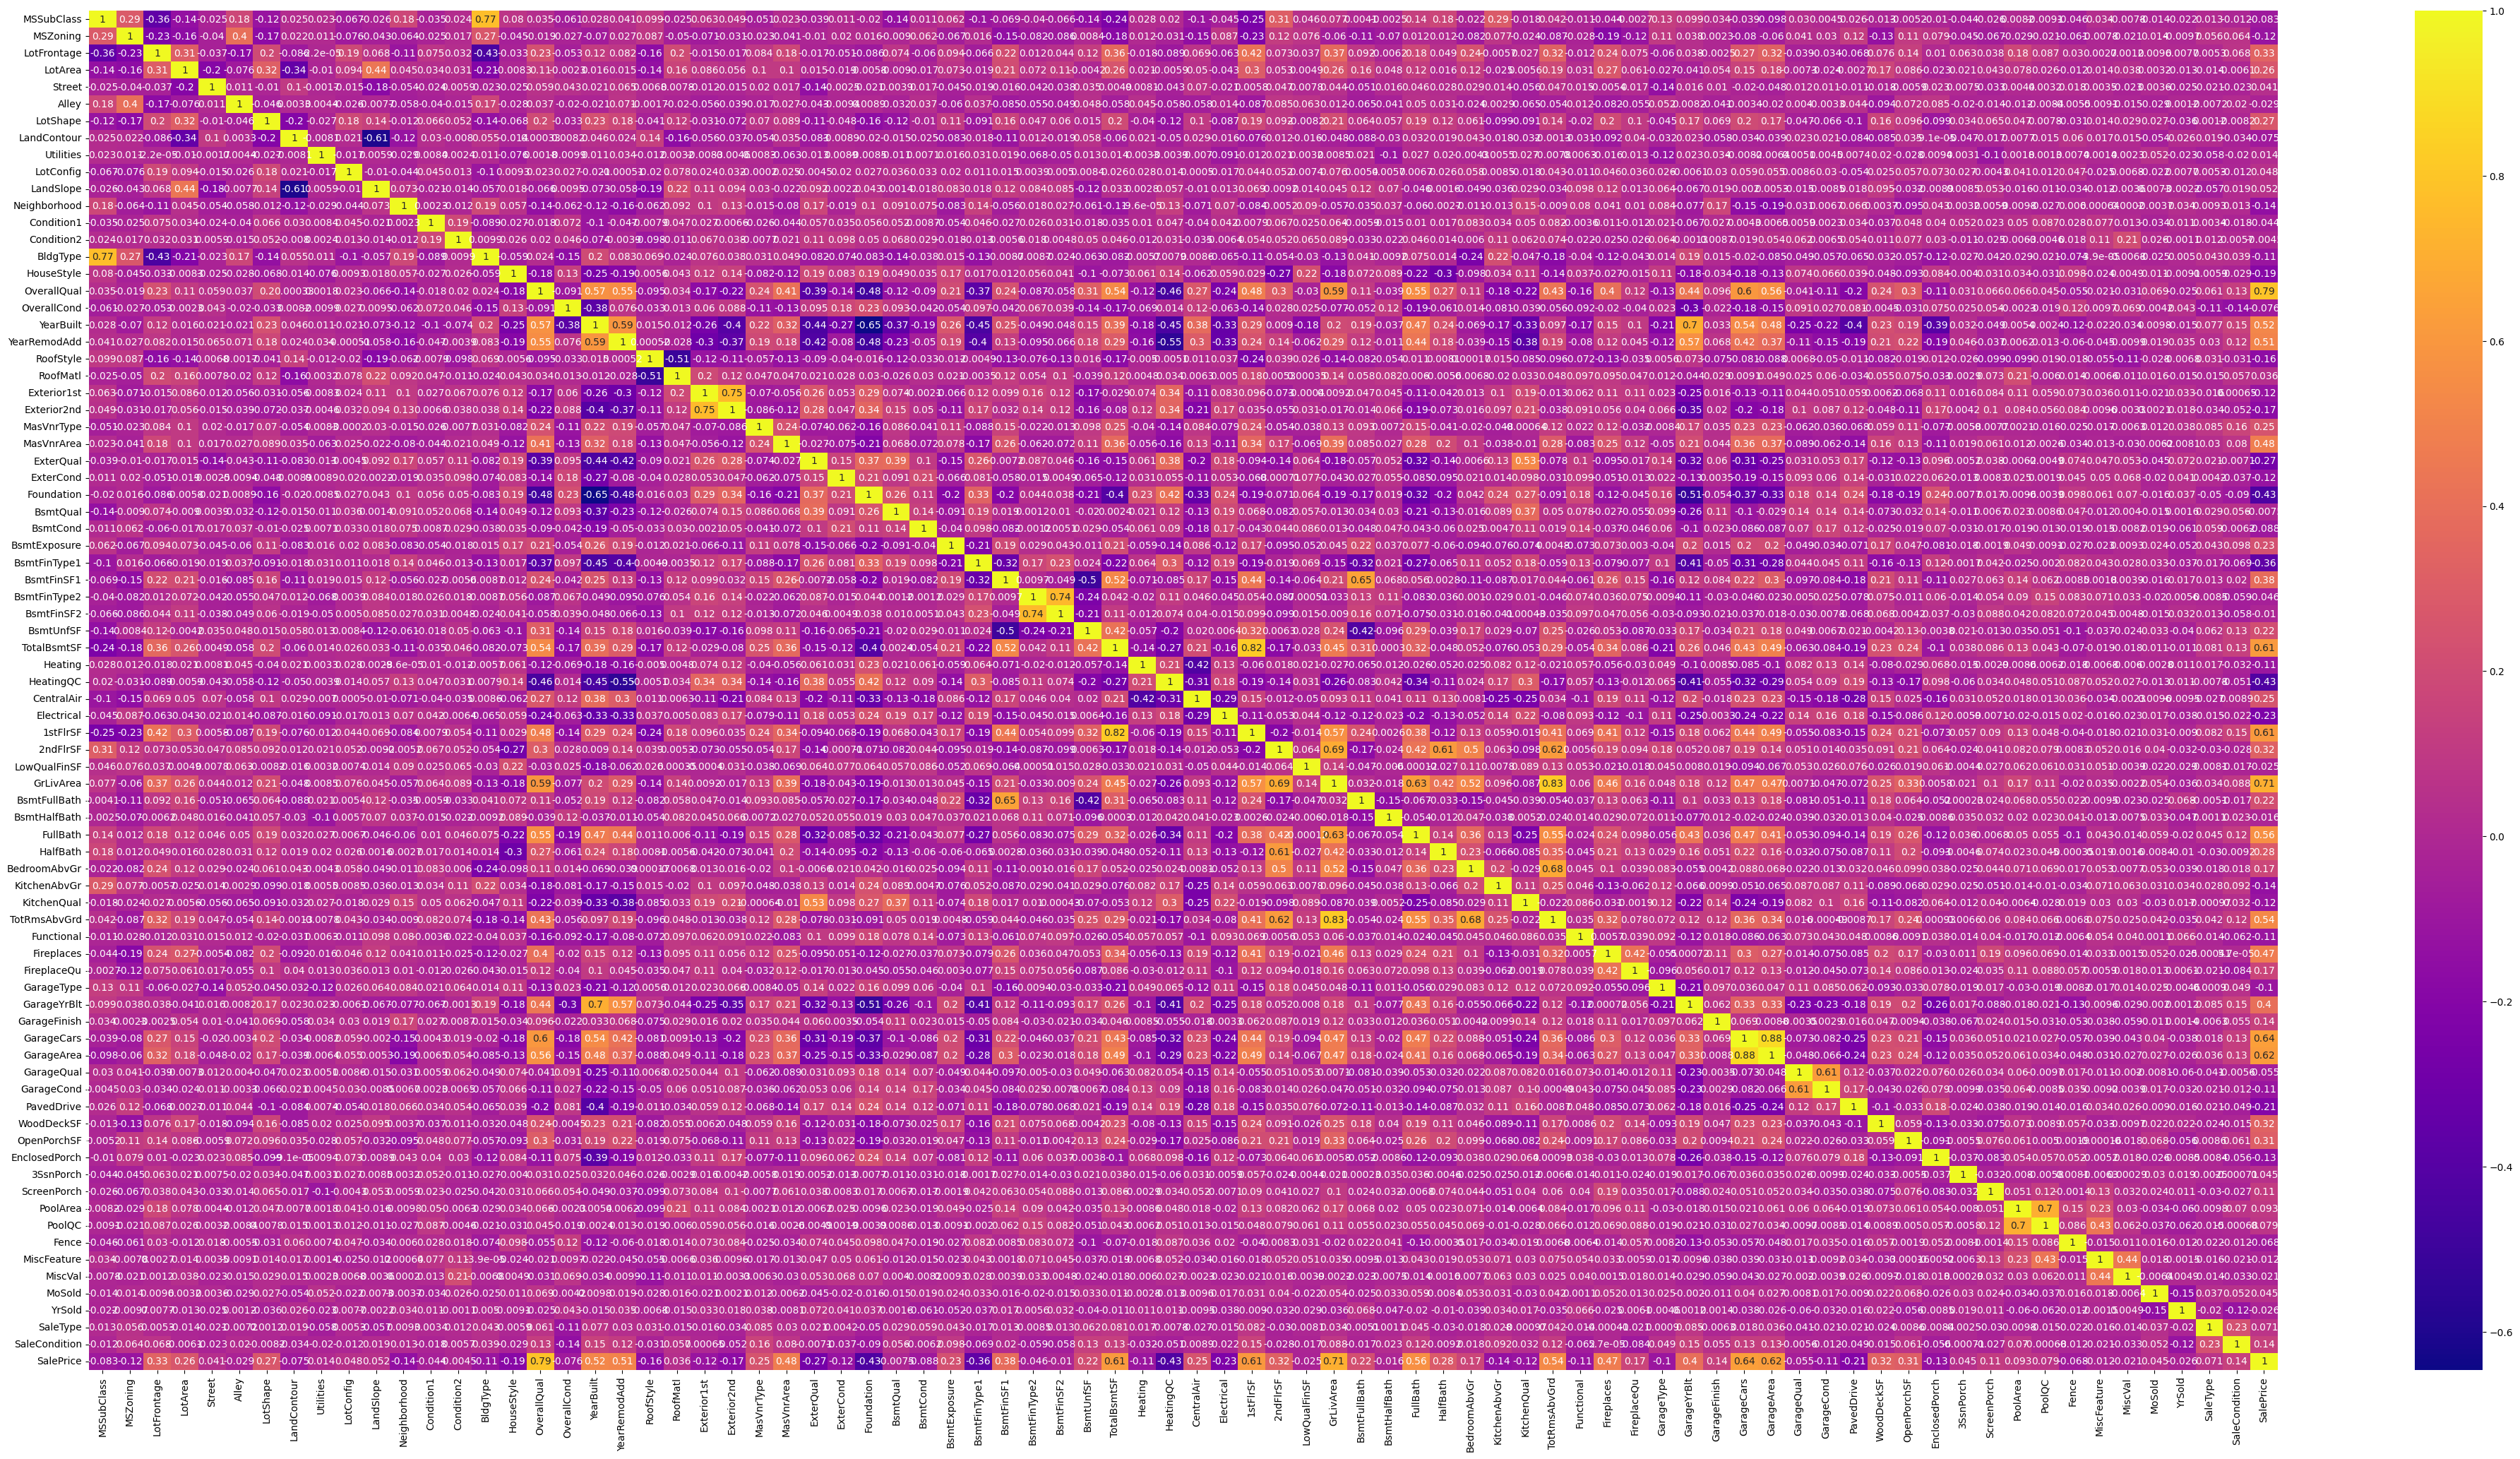

In [181]:
corr = df_train.corr()
plt.figure(figsize=(50,25))
sns.heatmap(corr,annot=True,cbar=True,cmap='plasma')
plt.show()

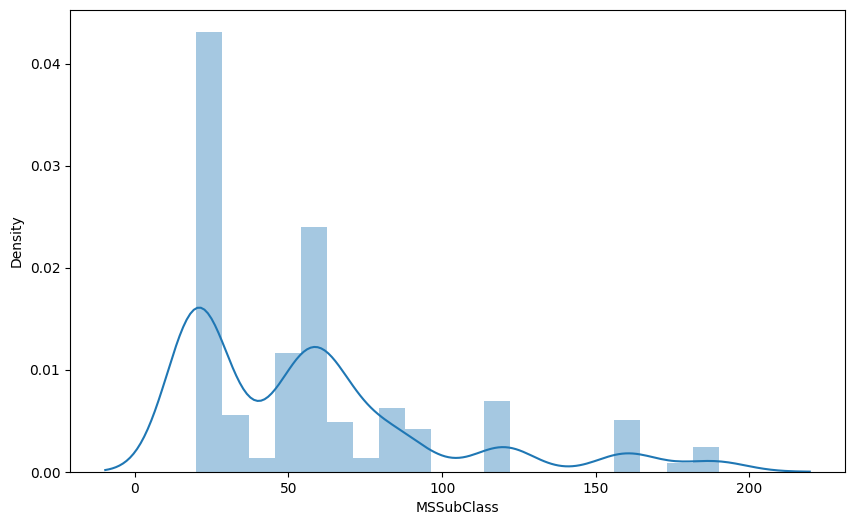

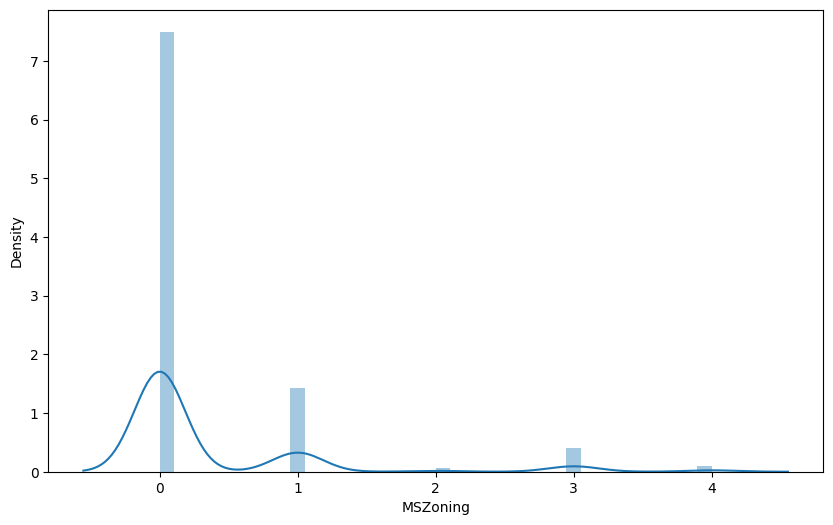

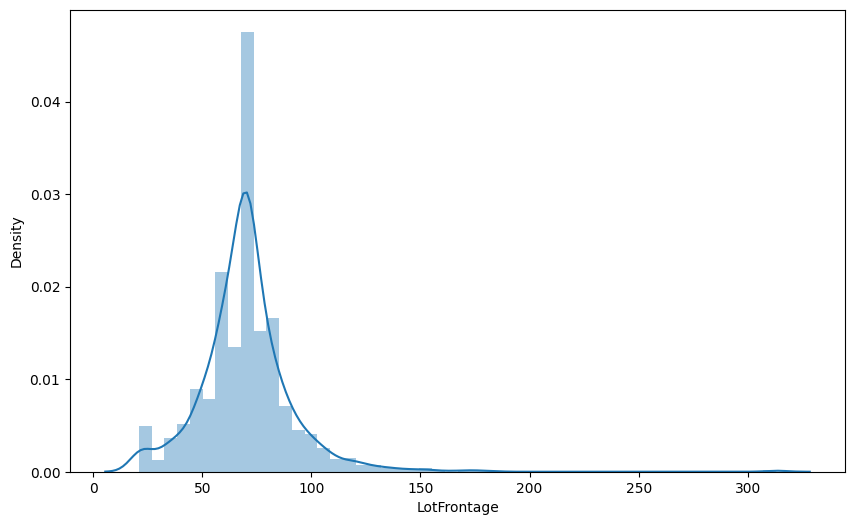

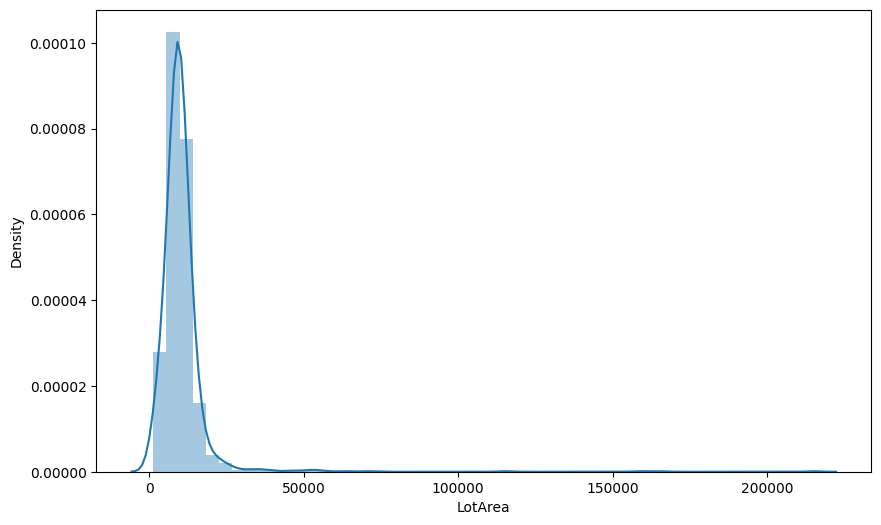

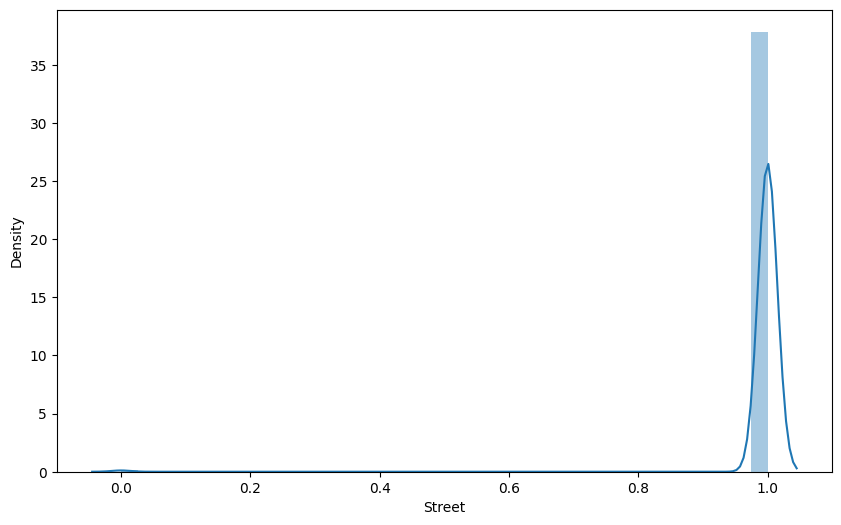

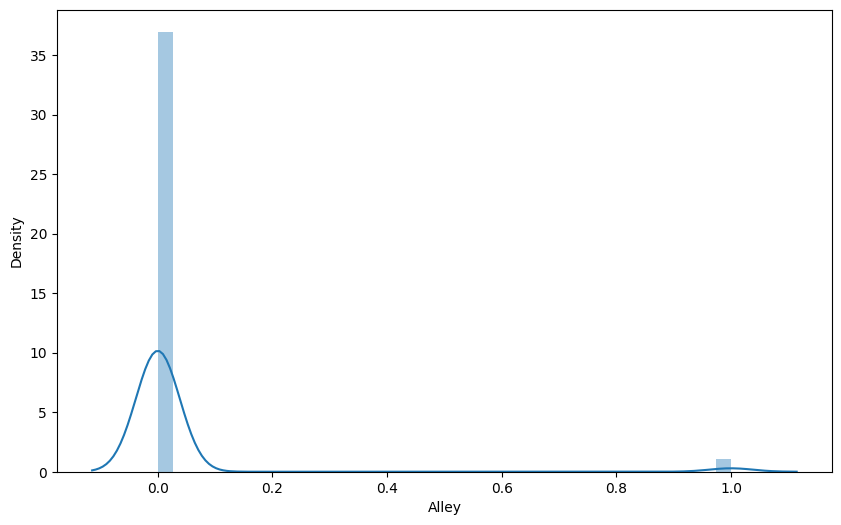

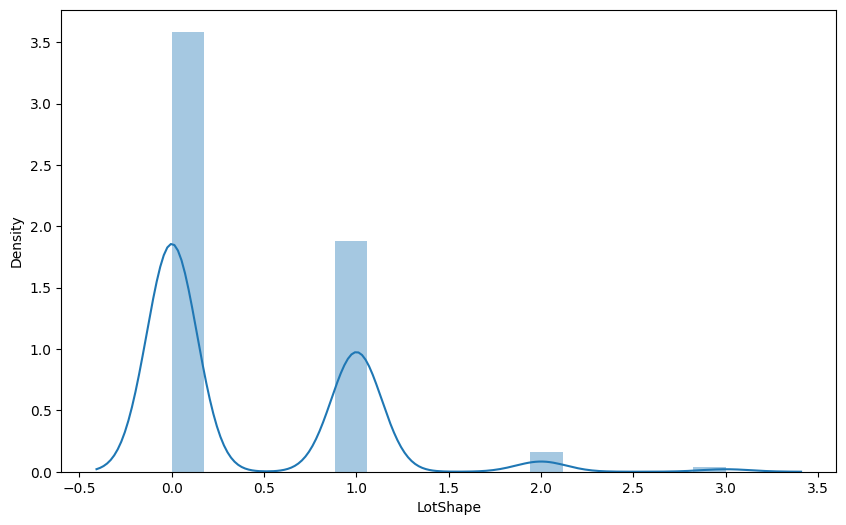

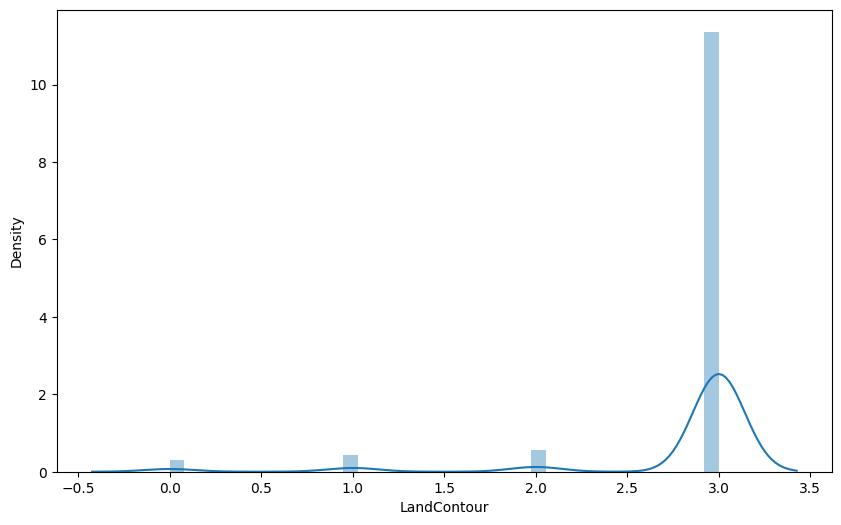

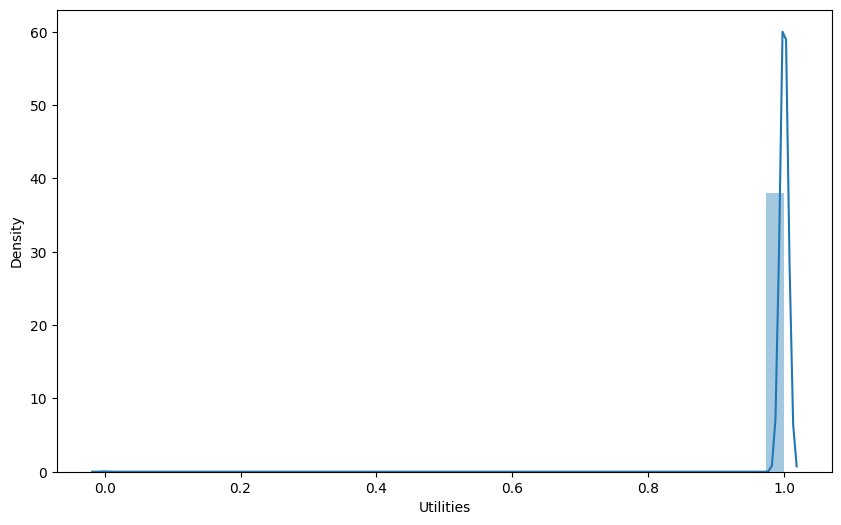

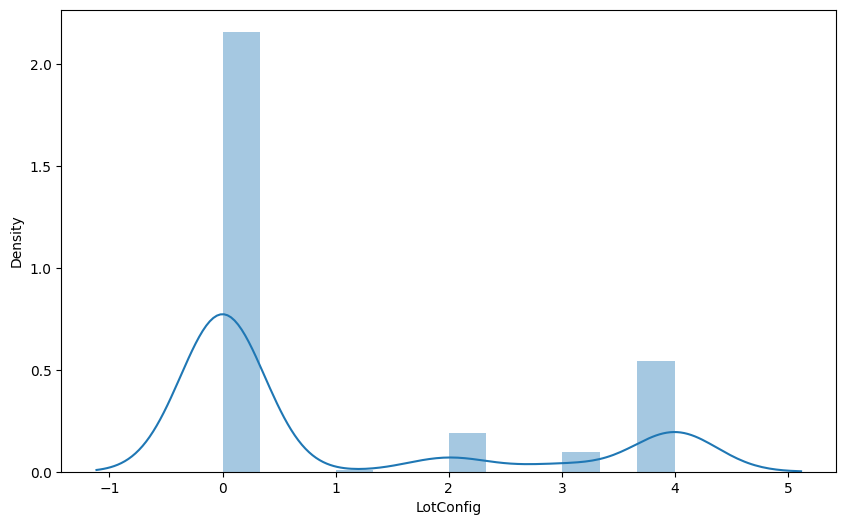

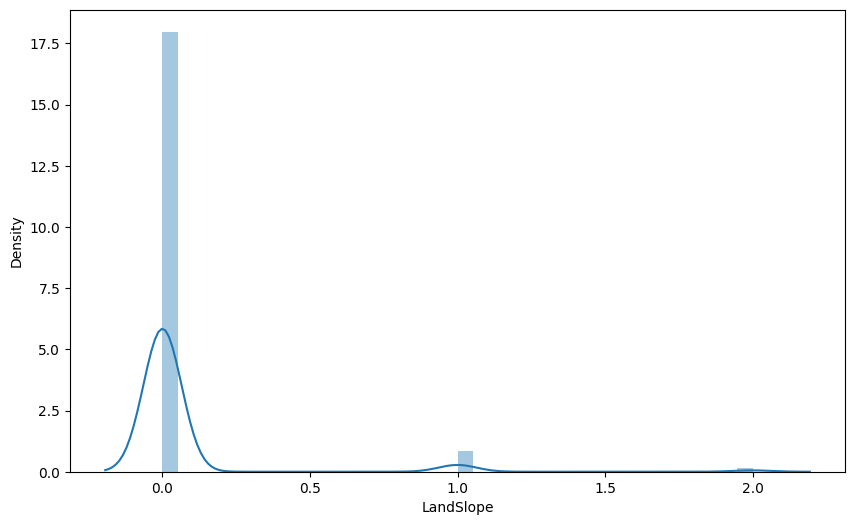

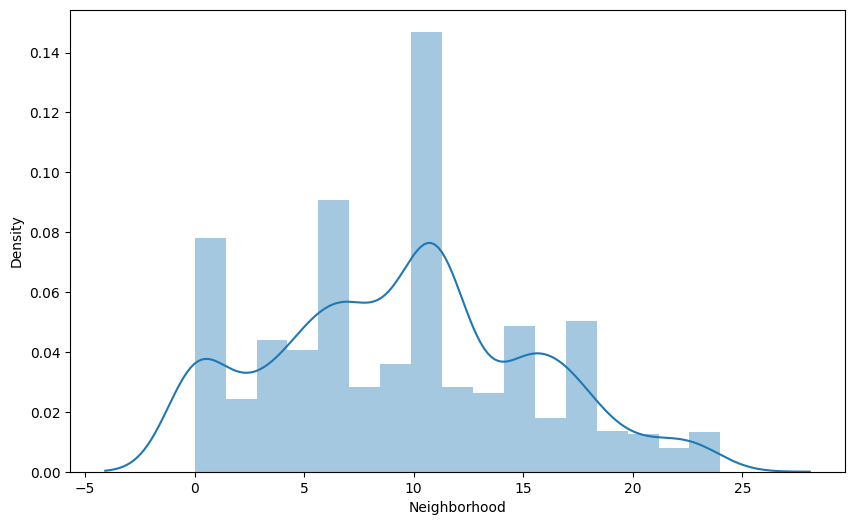

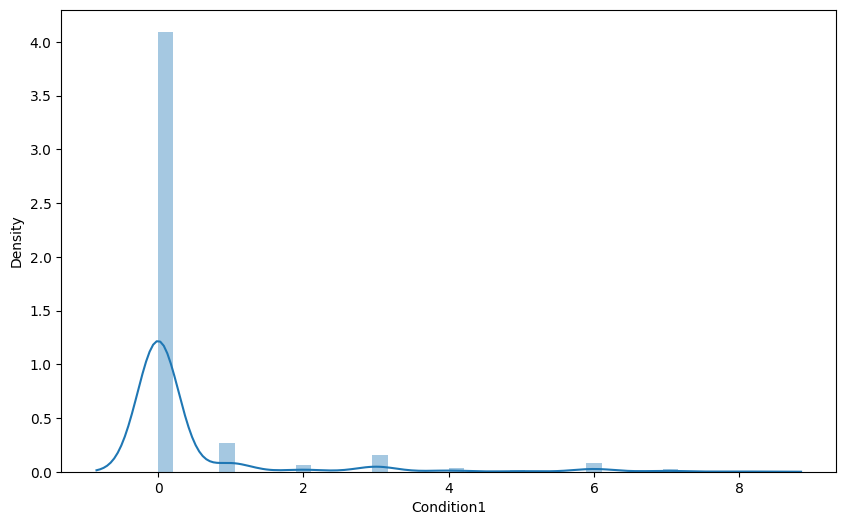

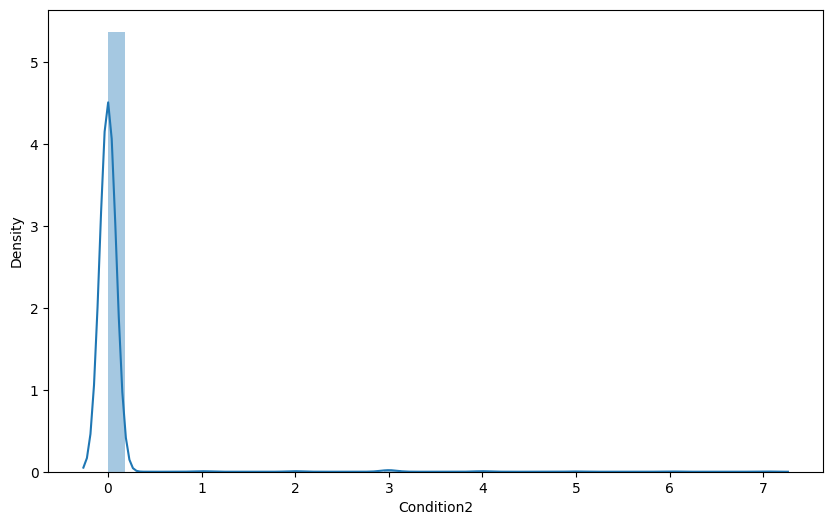

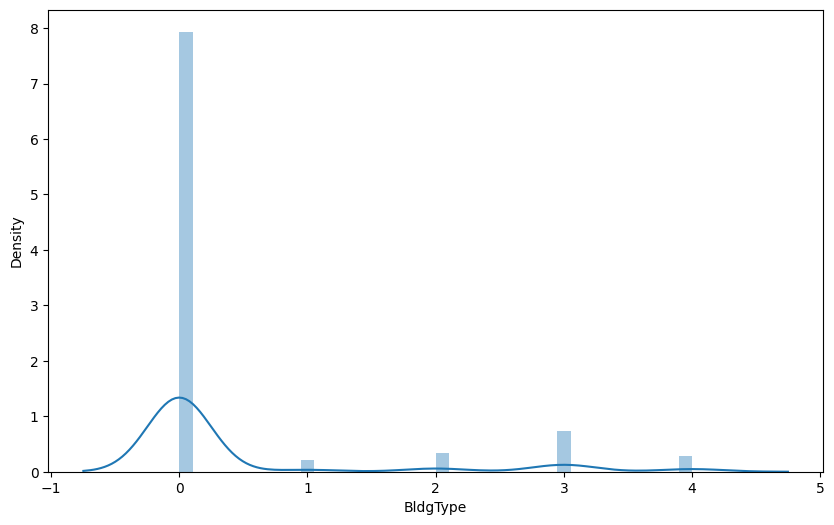

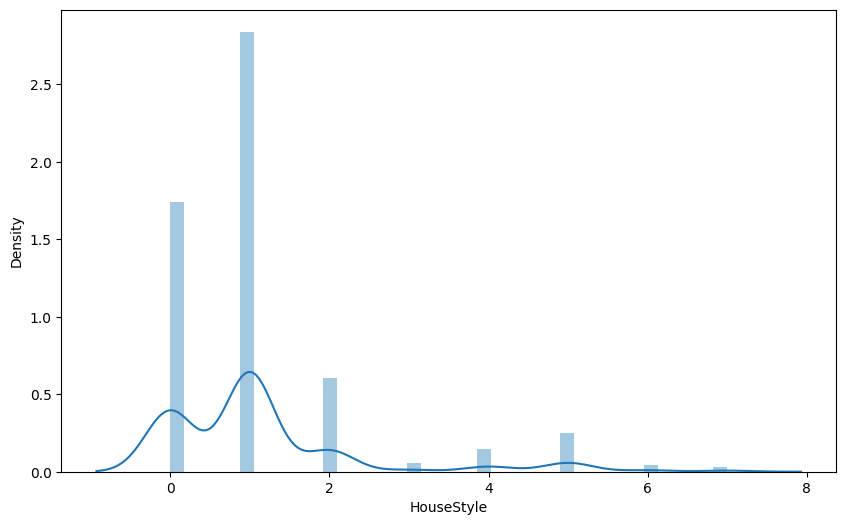

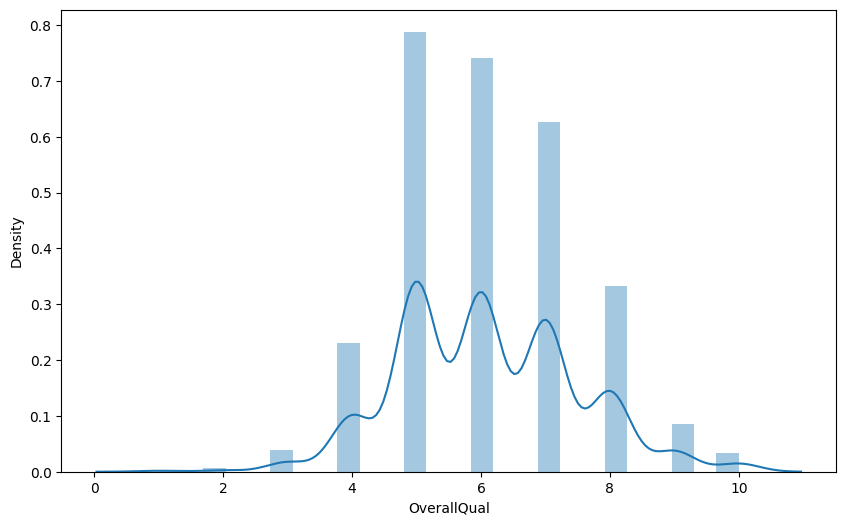

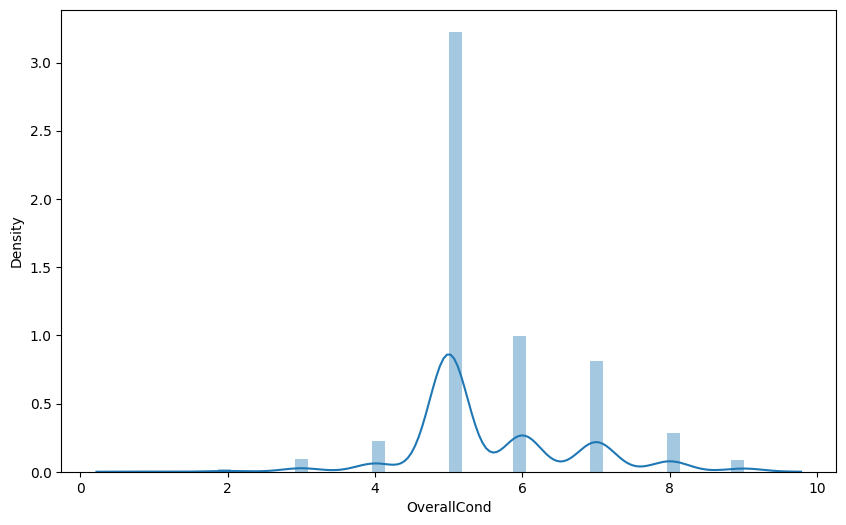

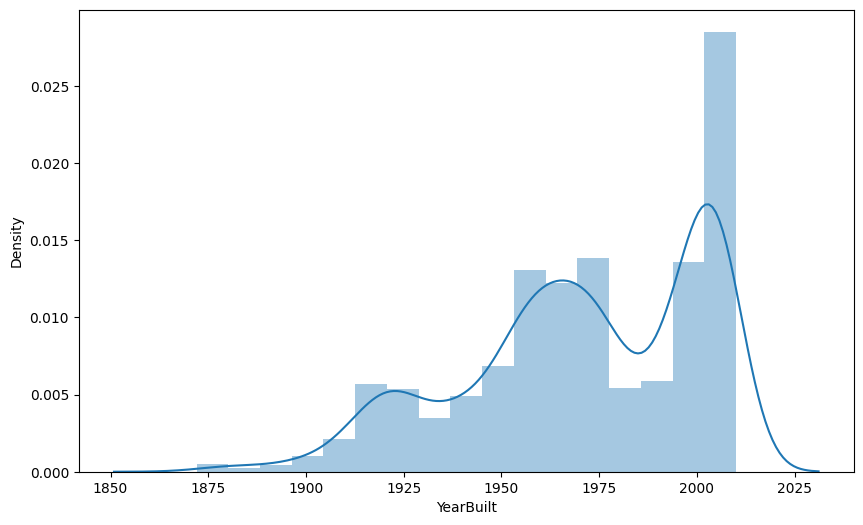

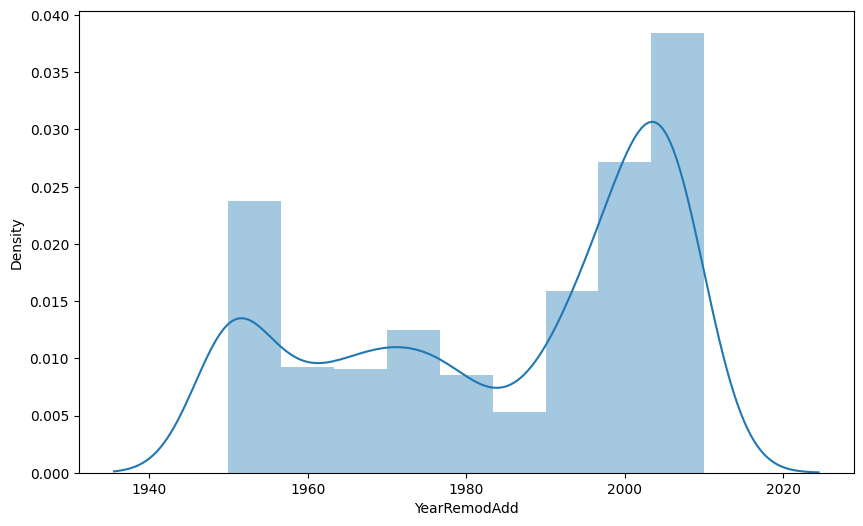

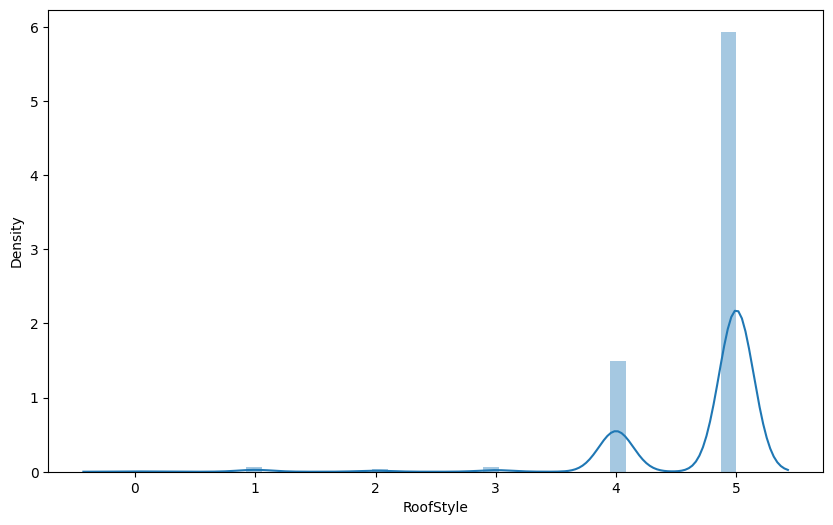

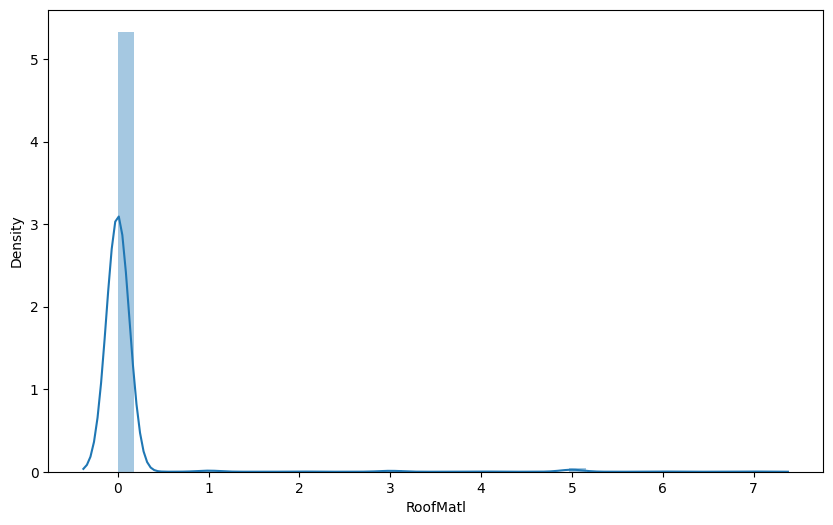

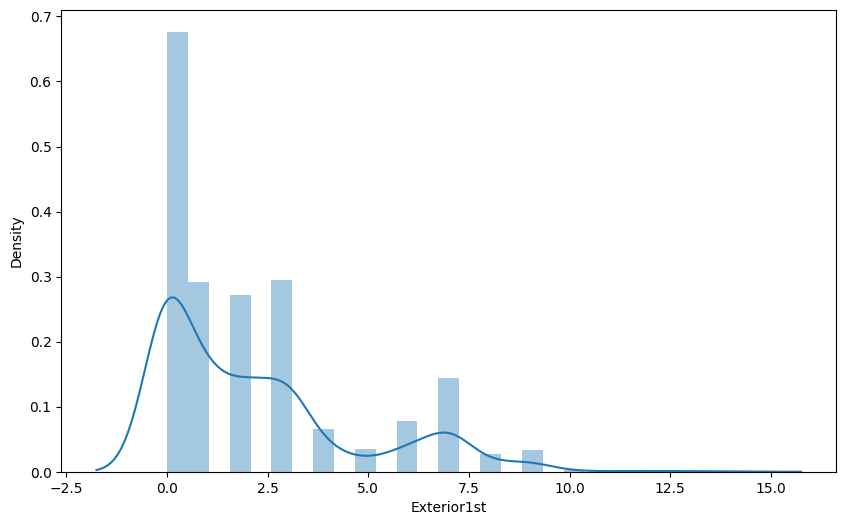

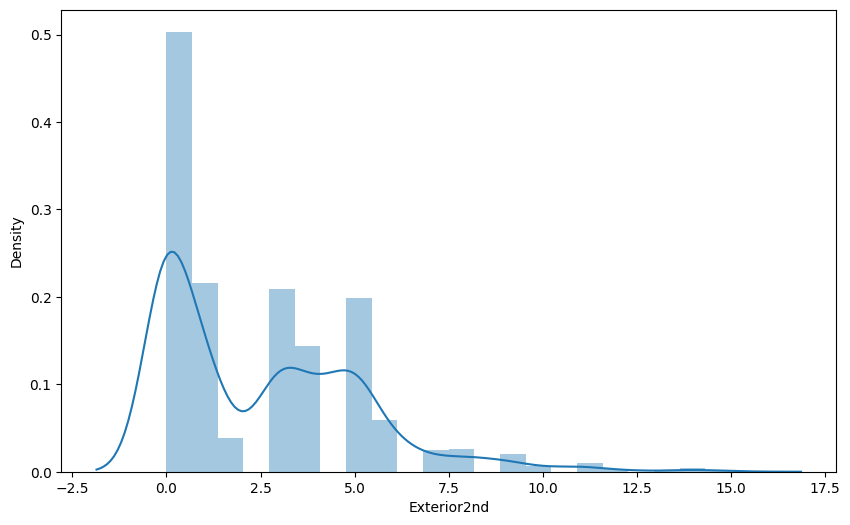

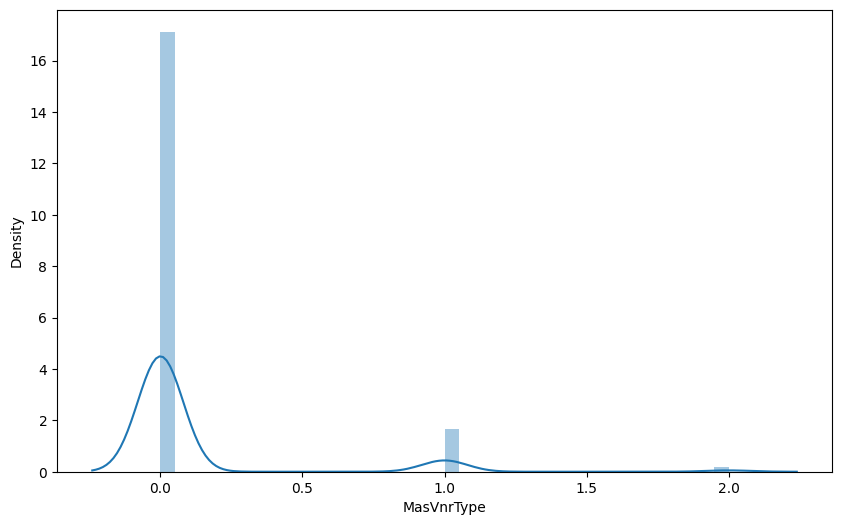

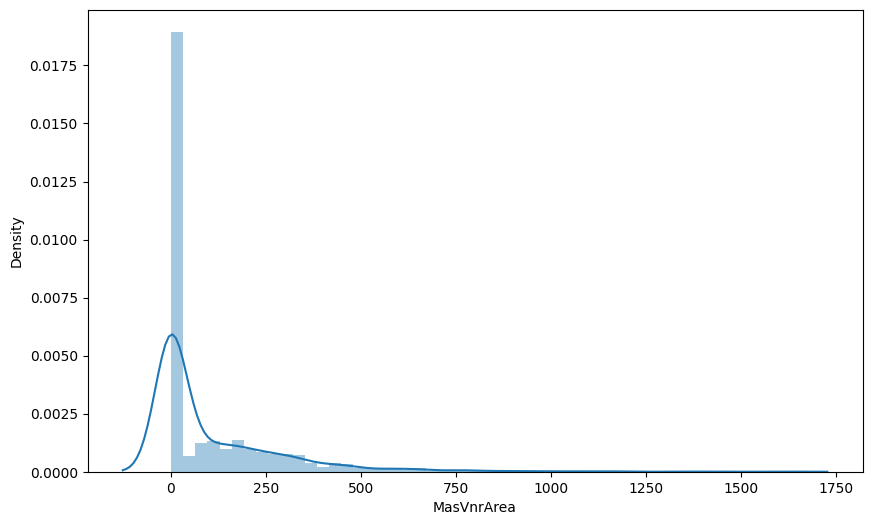

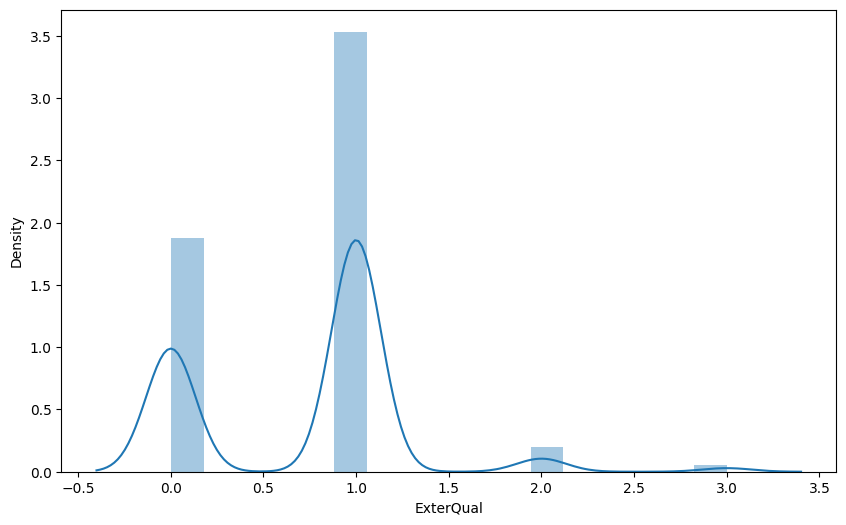

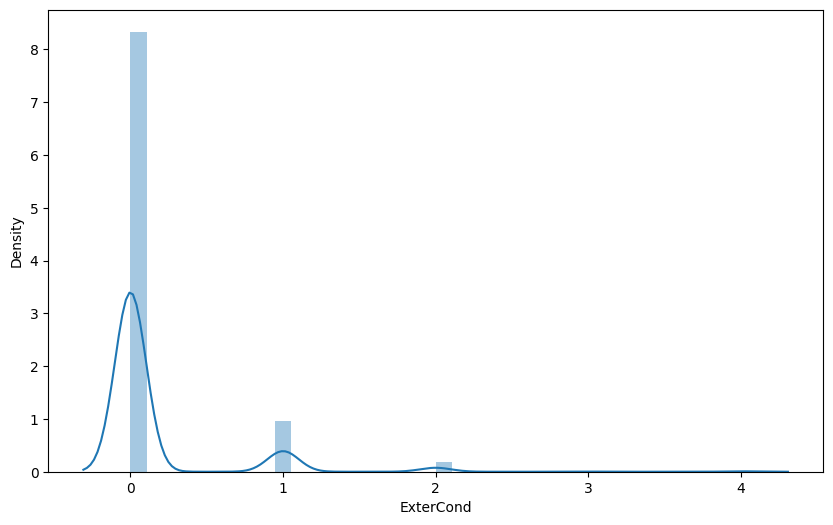

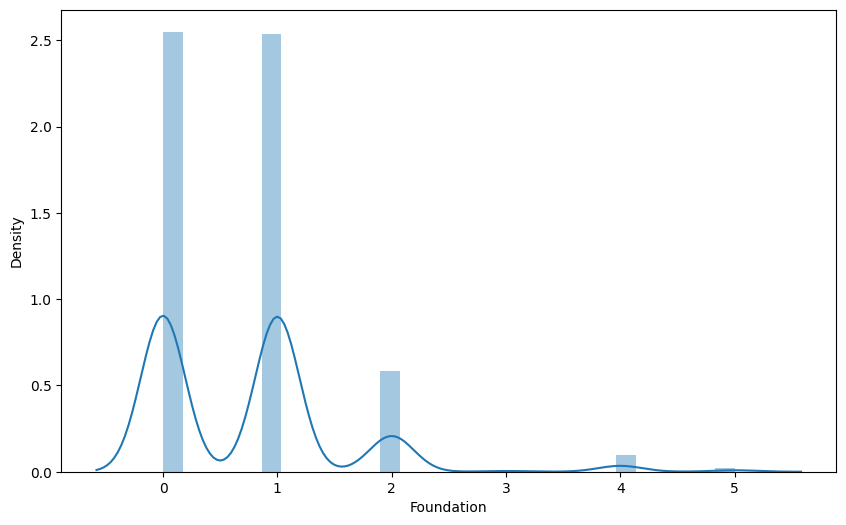

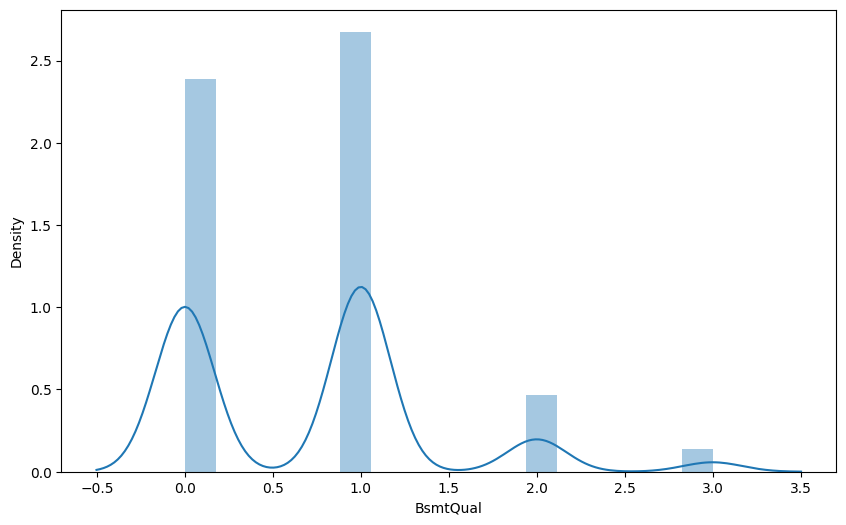

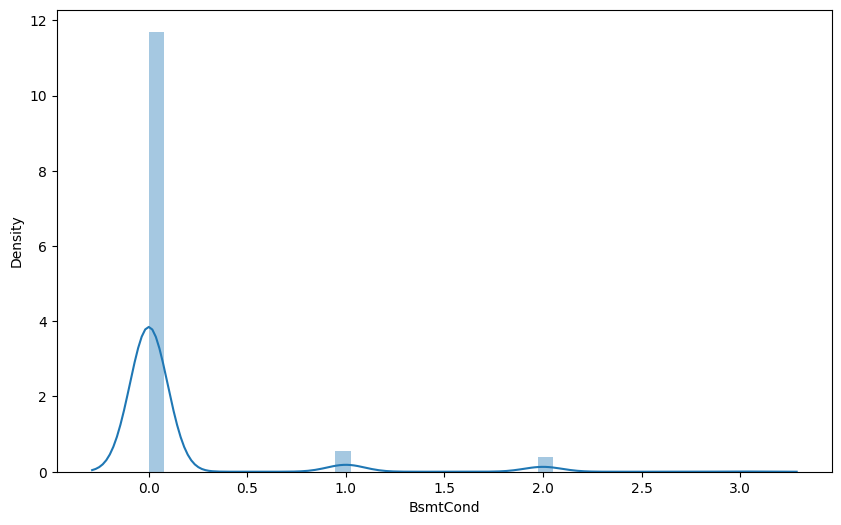

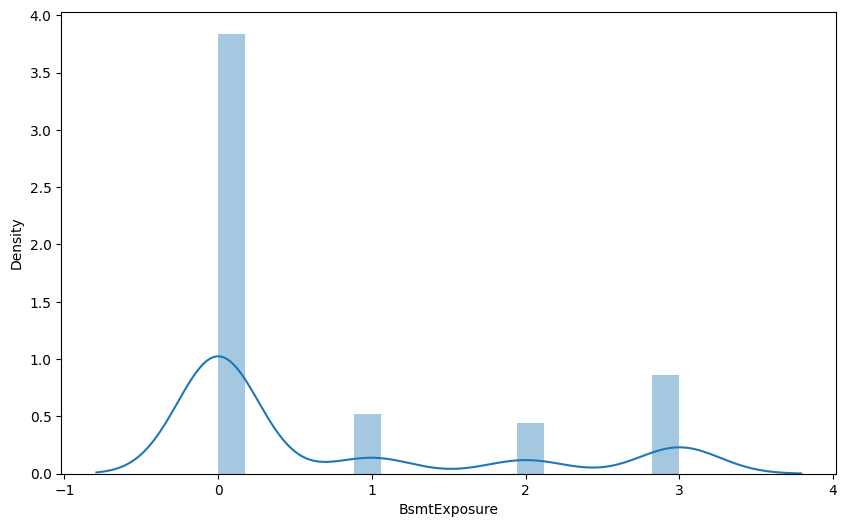

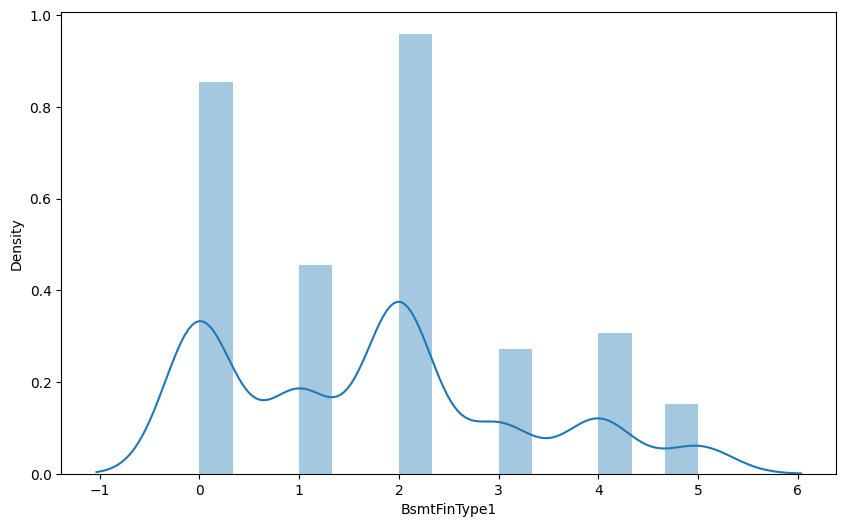

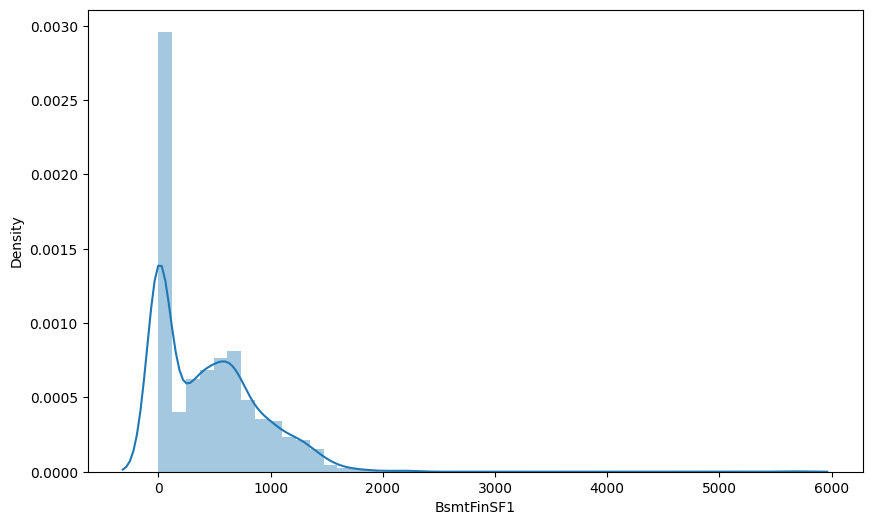

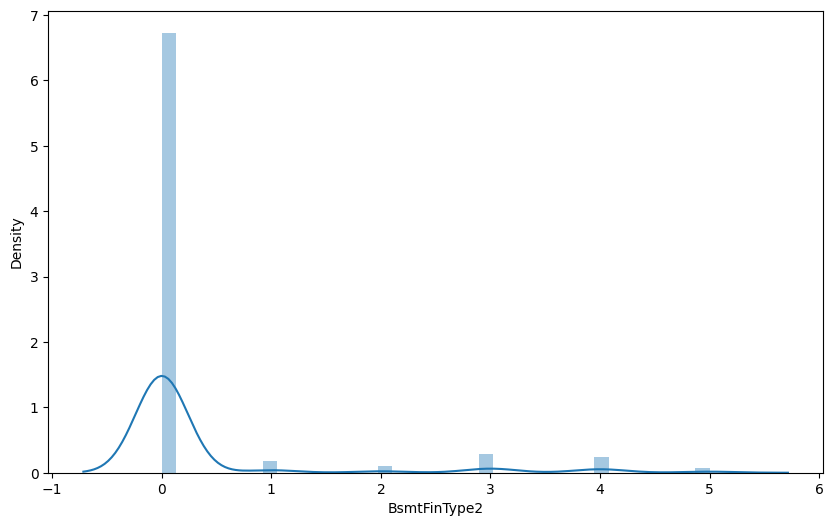

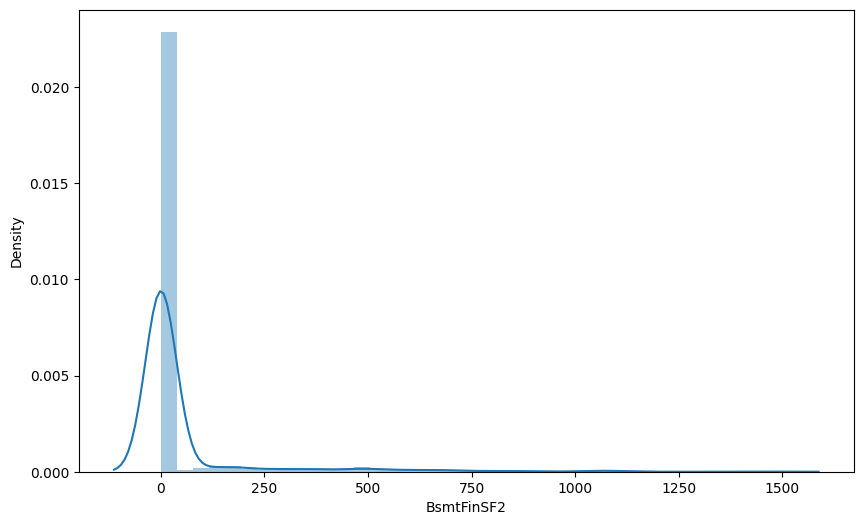

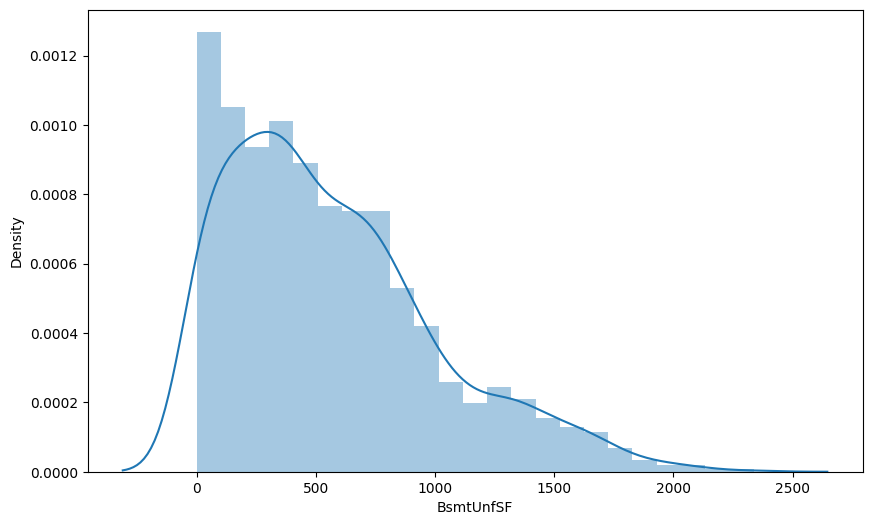

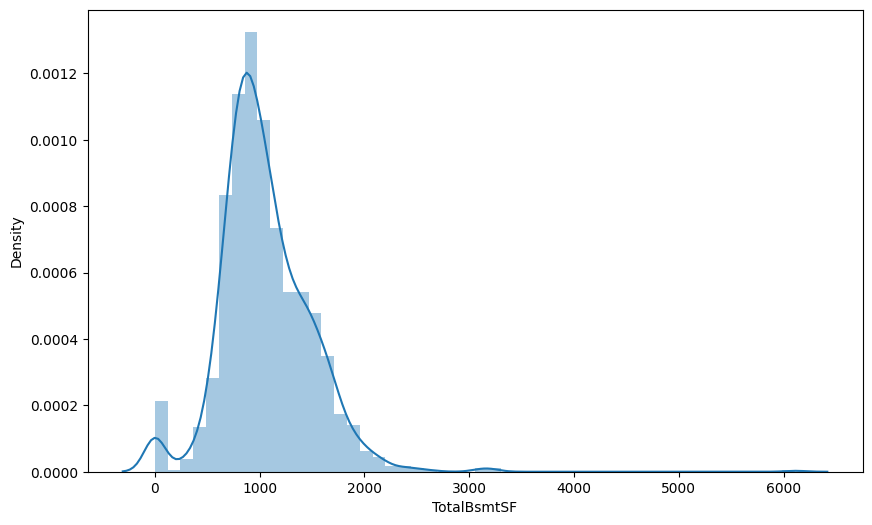

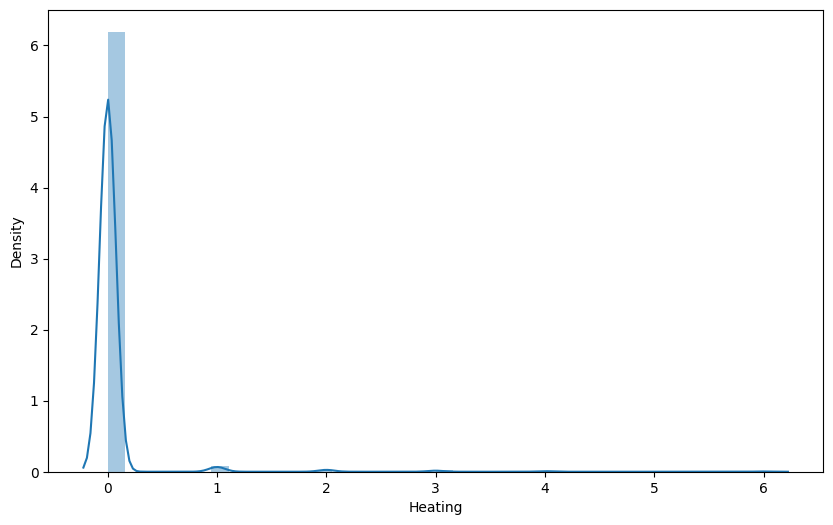

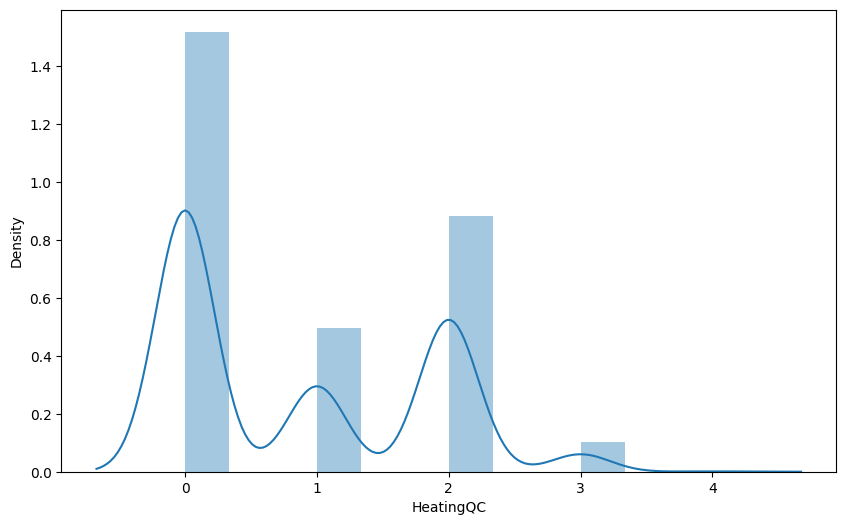

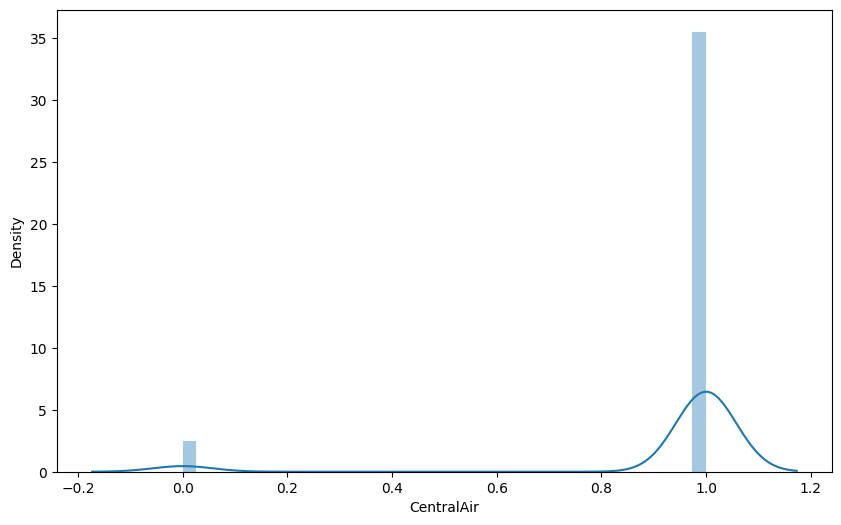

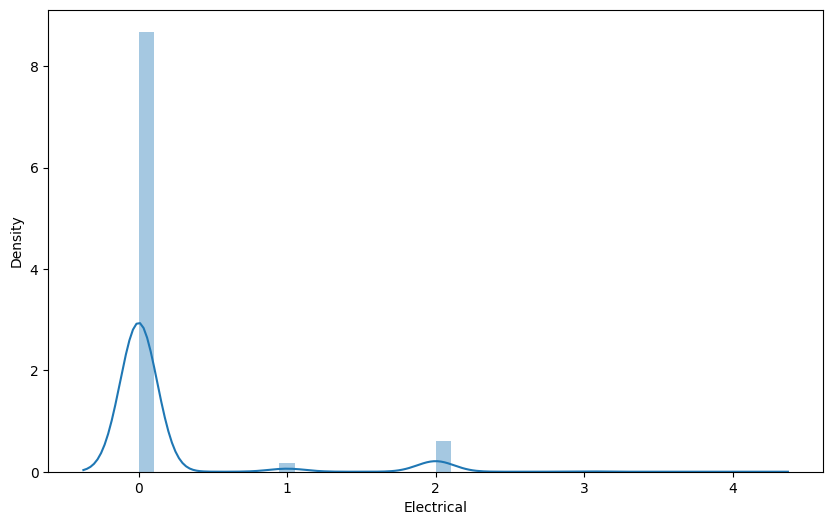

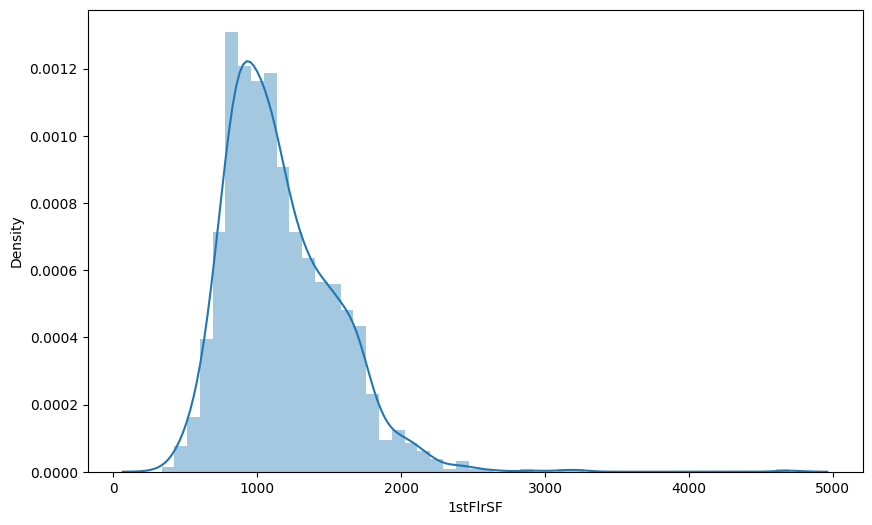

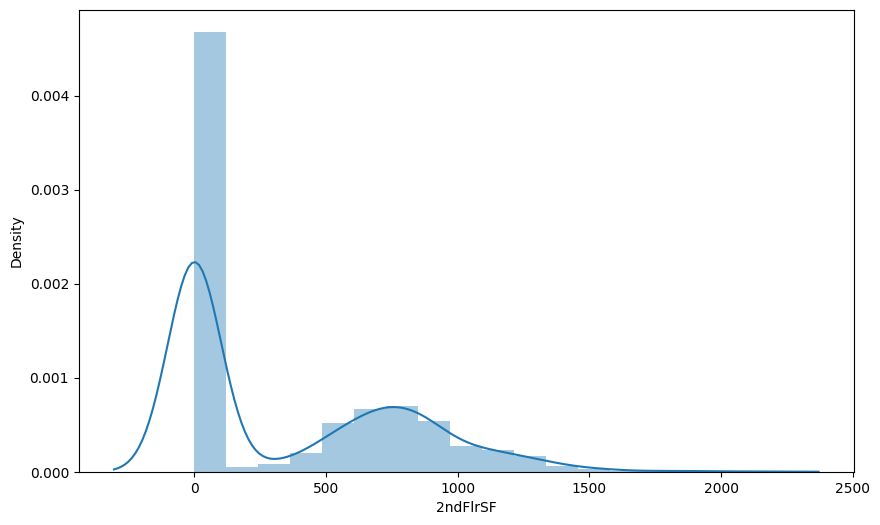

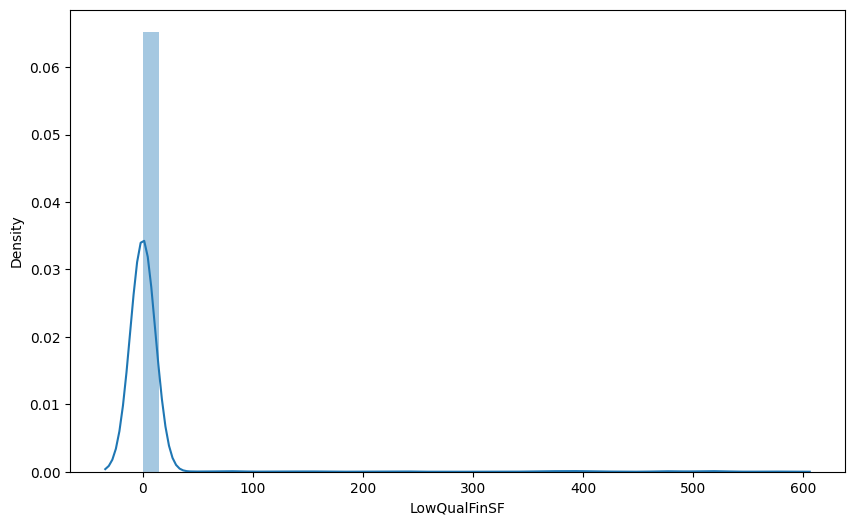

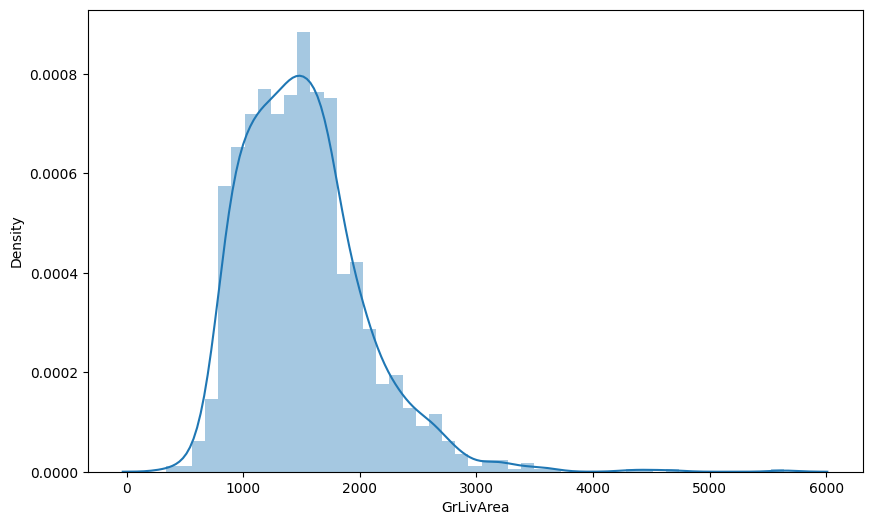

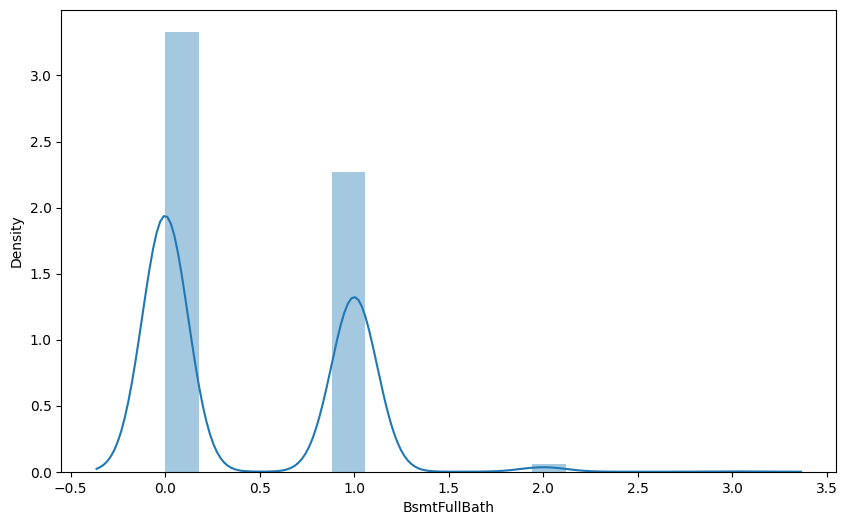

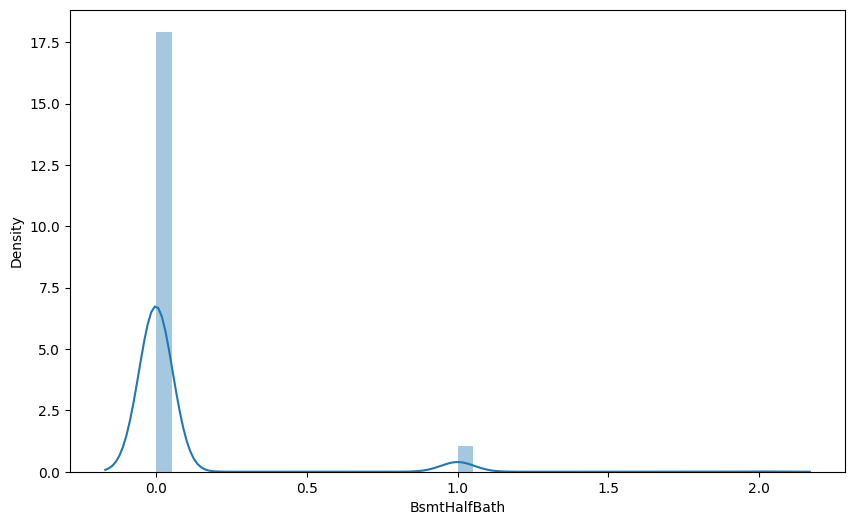

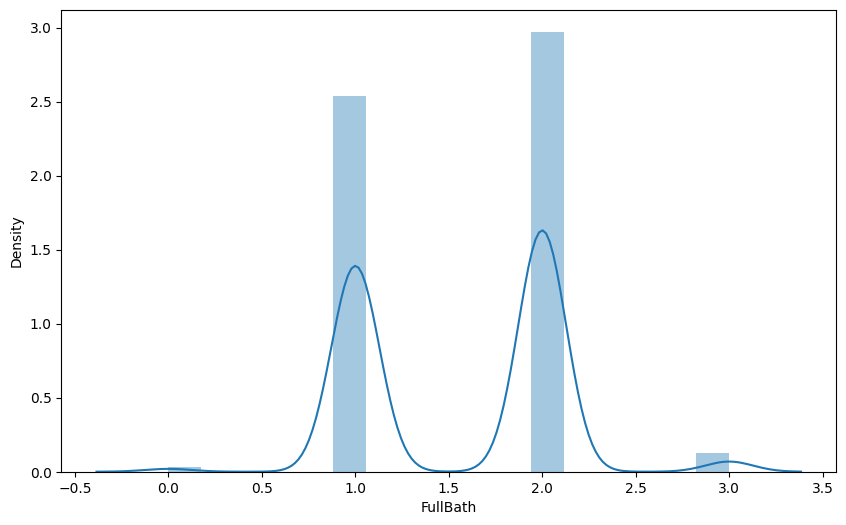

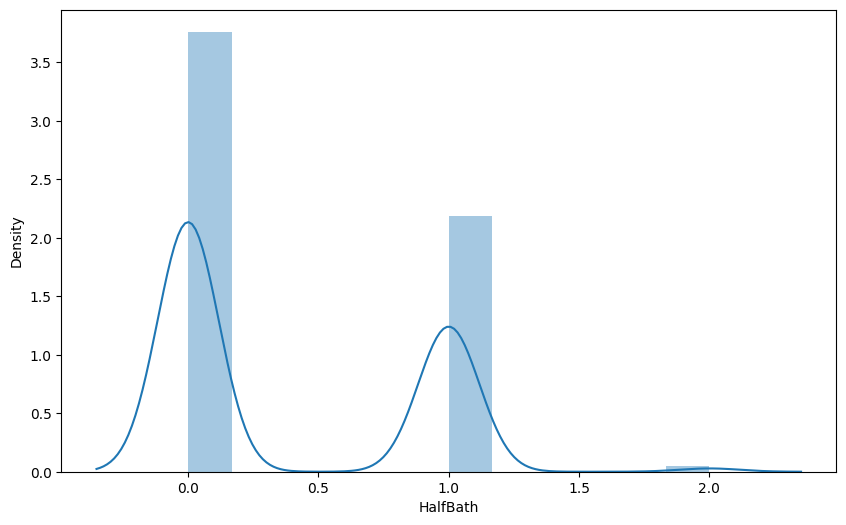

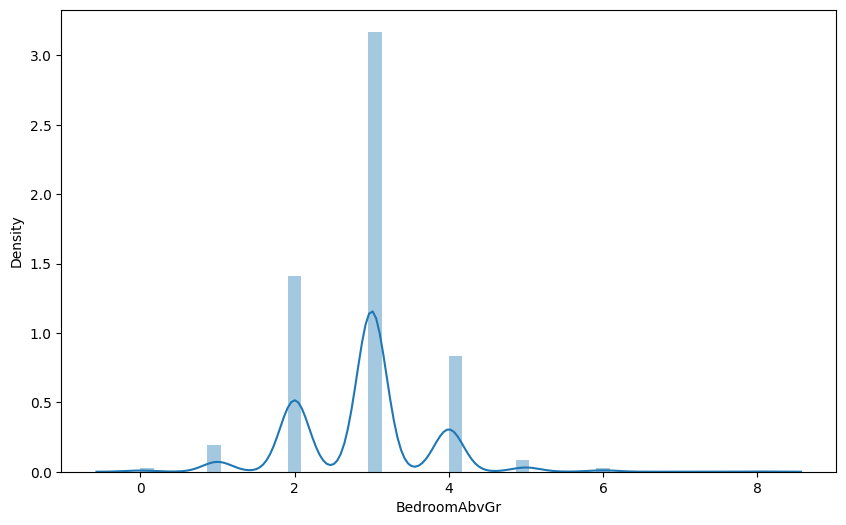

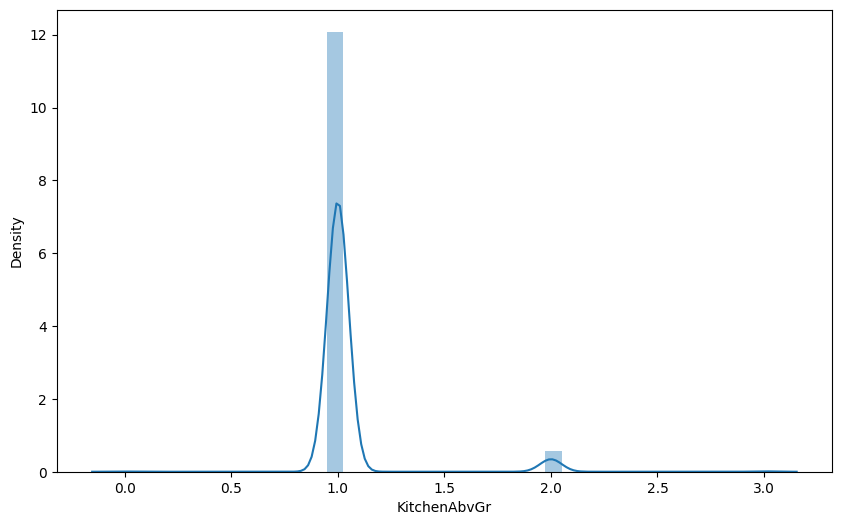

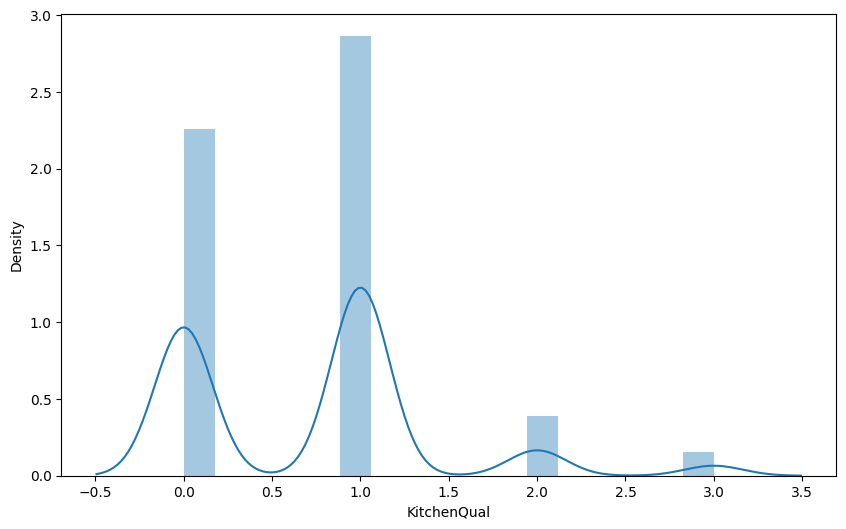

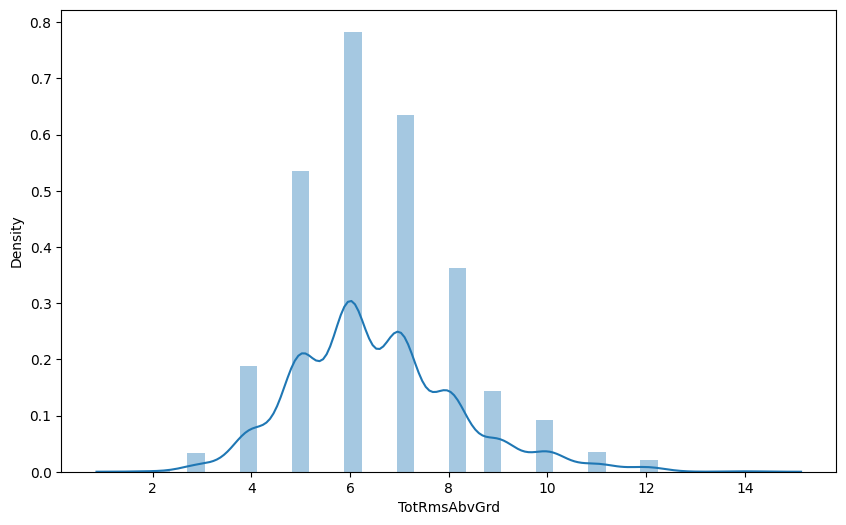

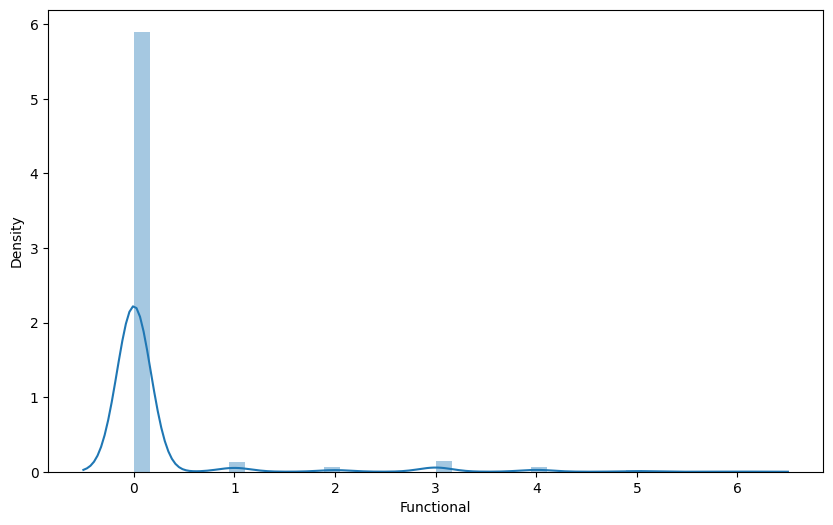

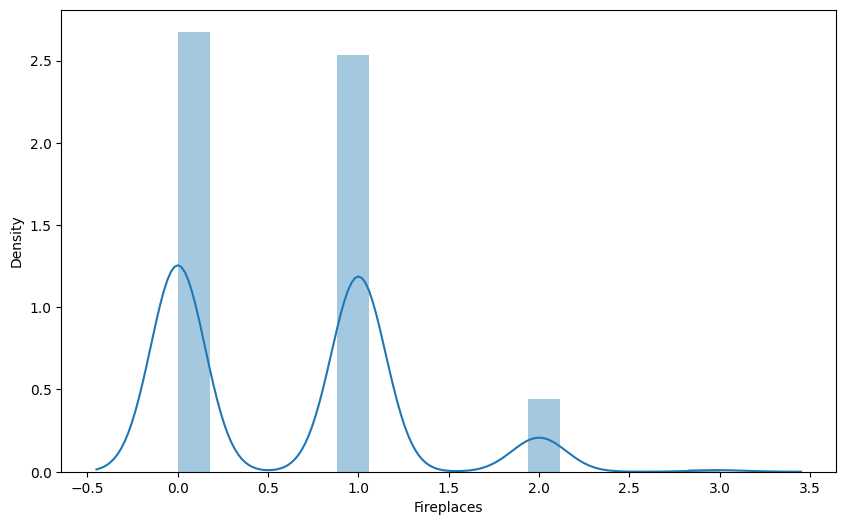

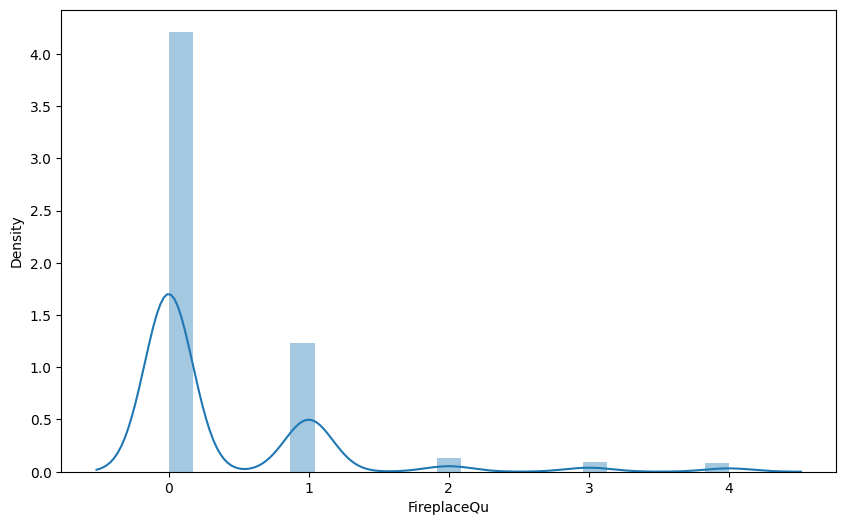

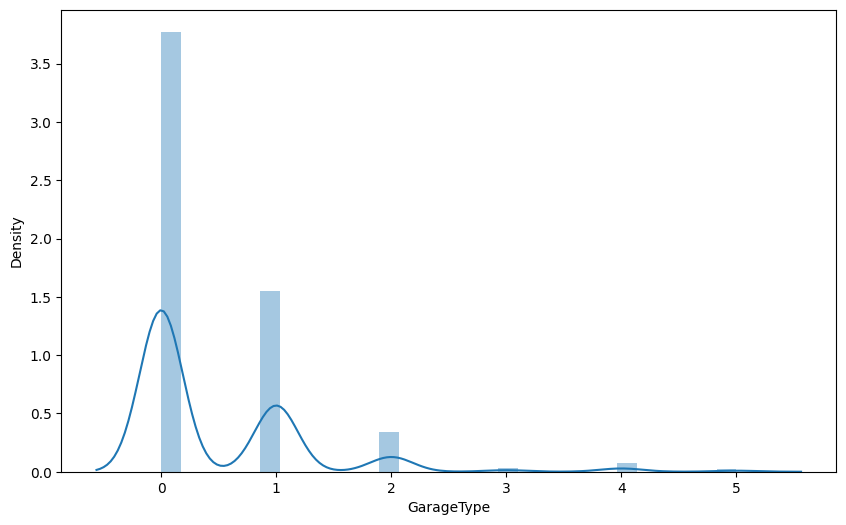

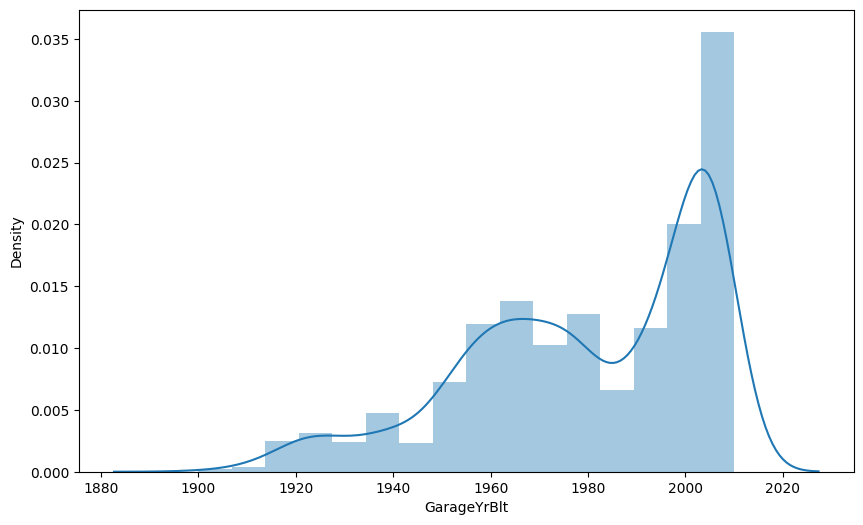

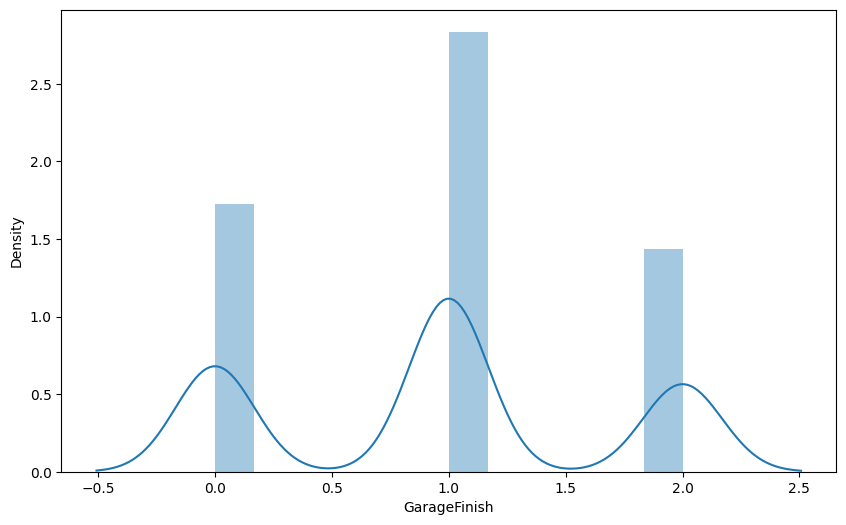

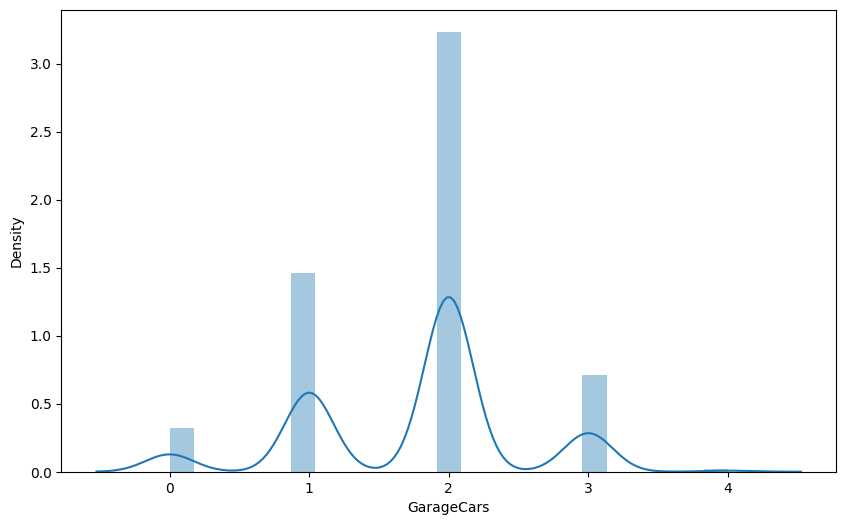

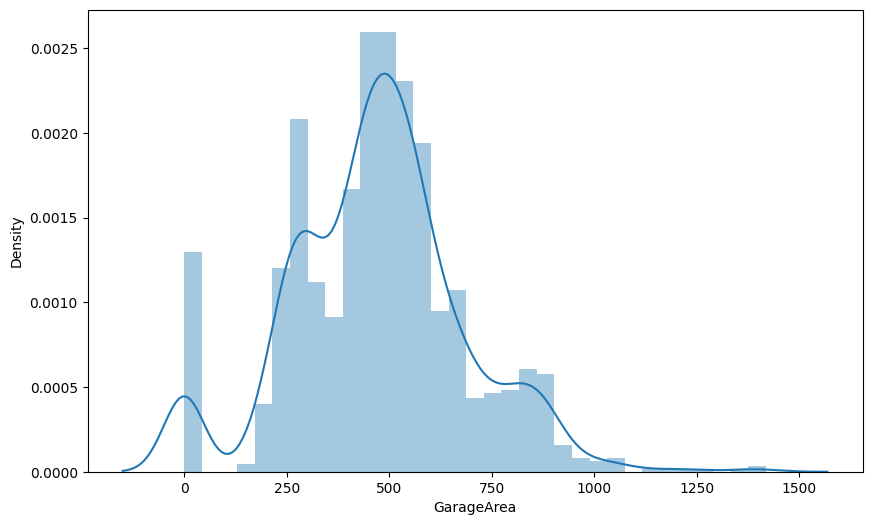

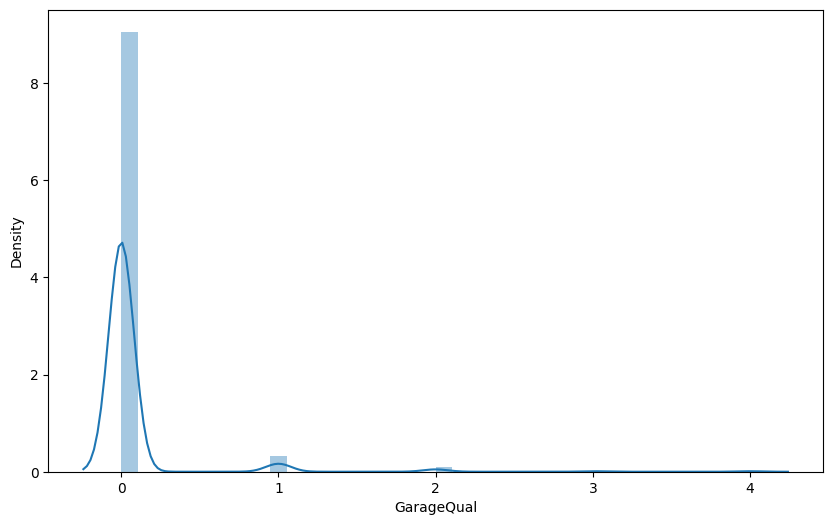

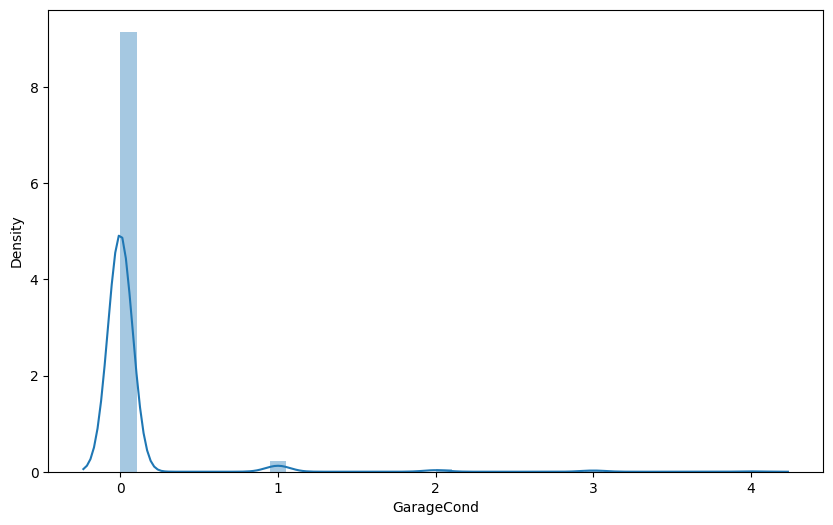

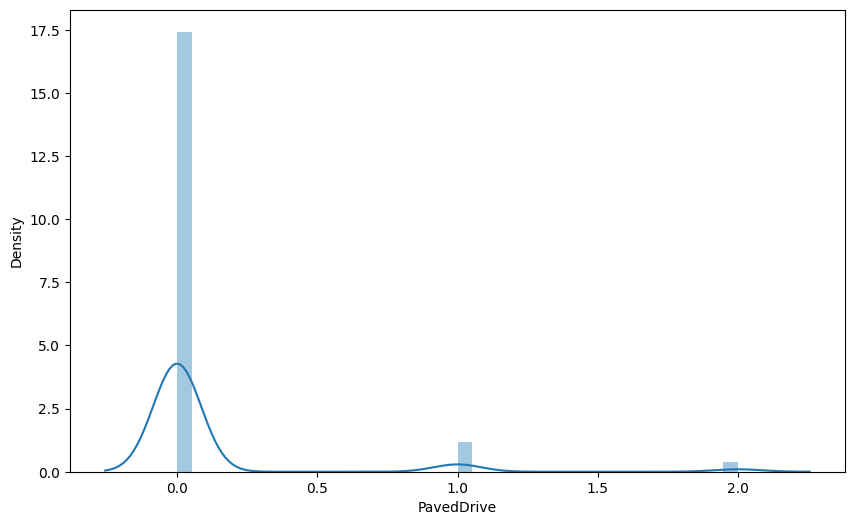

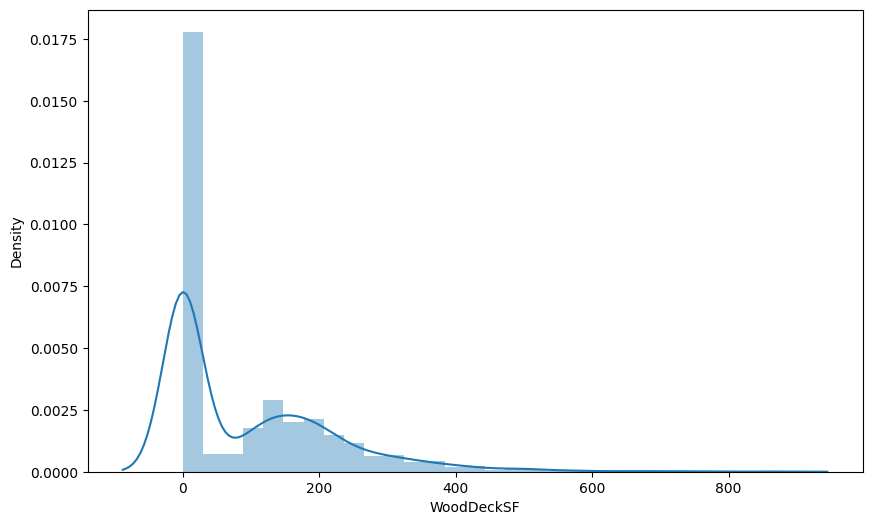

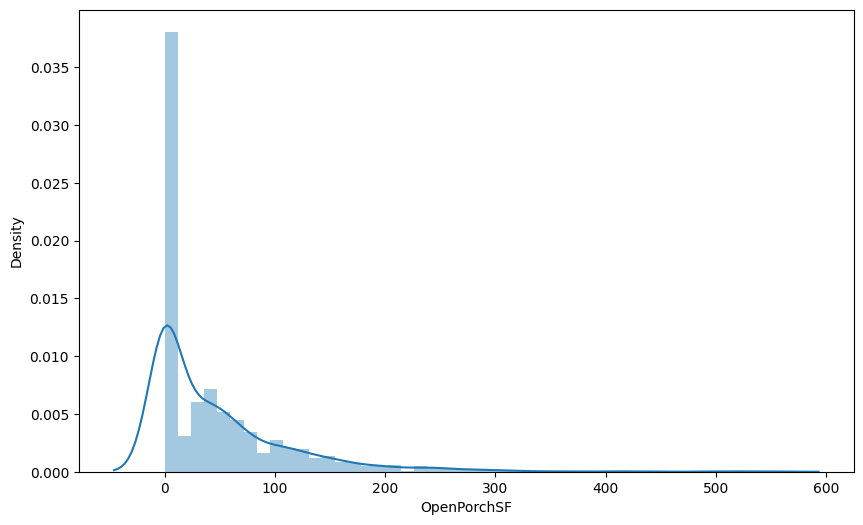

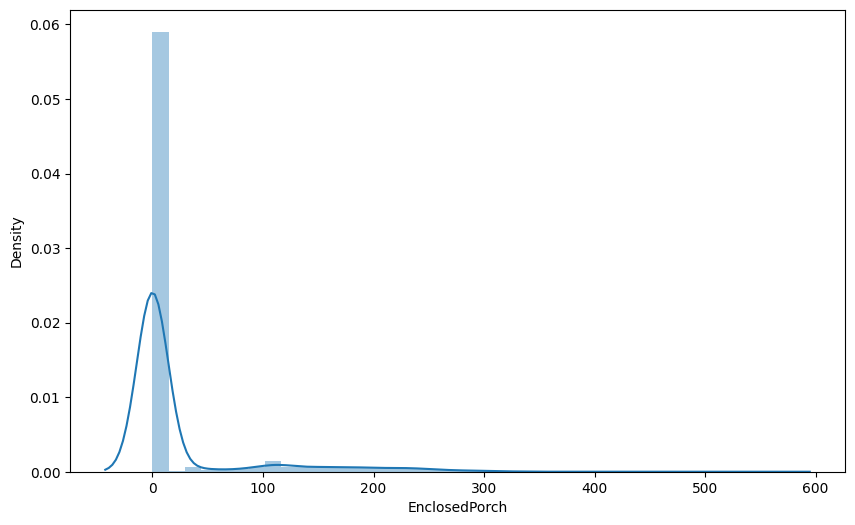

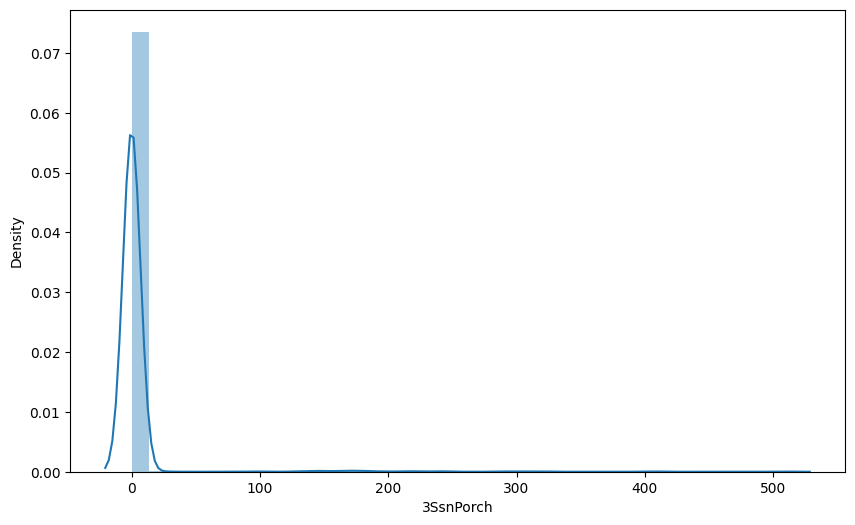

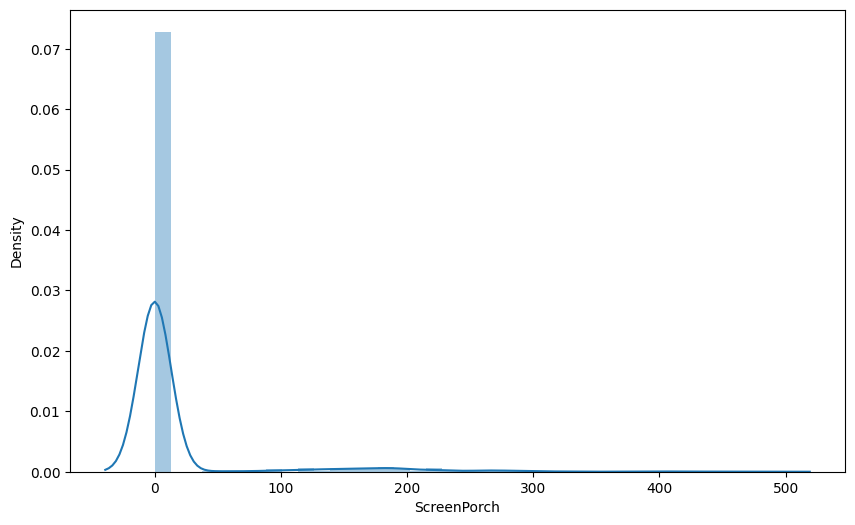

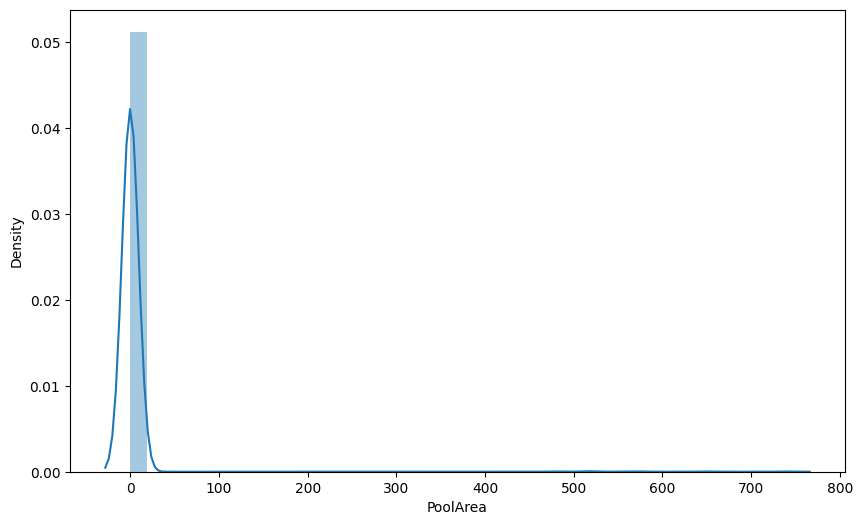

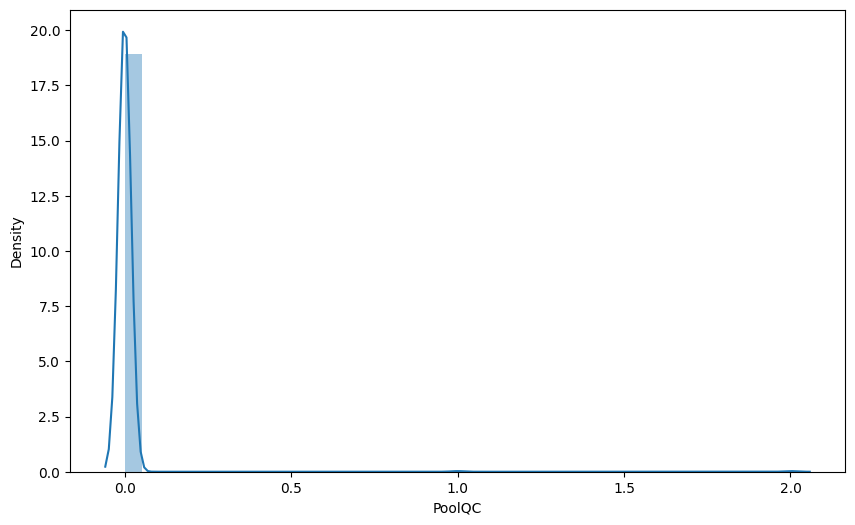

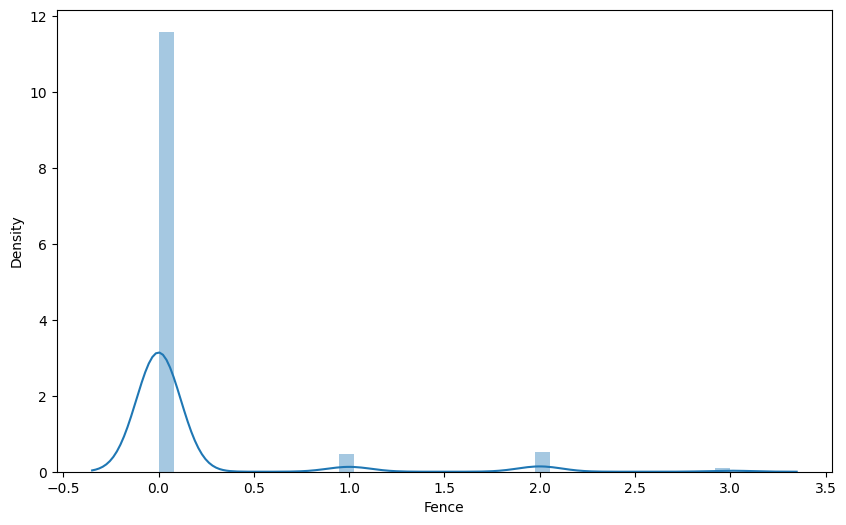

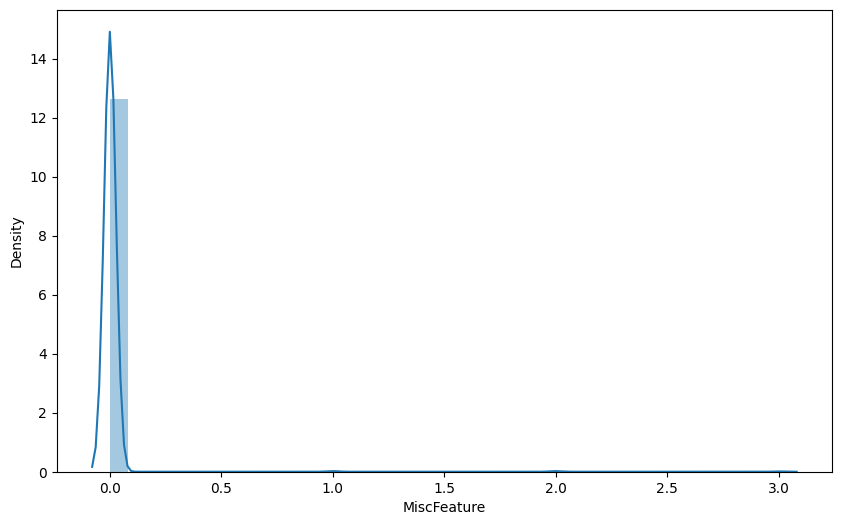

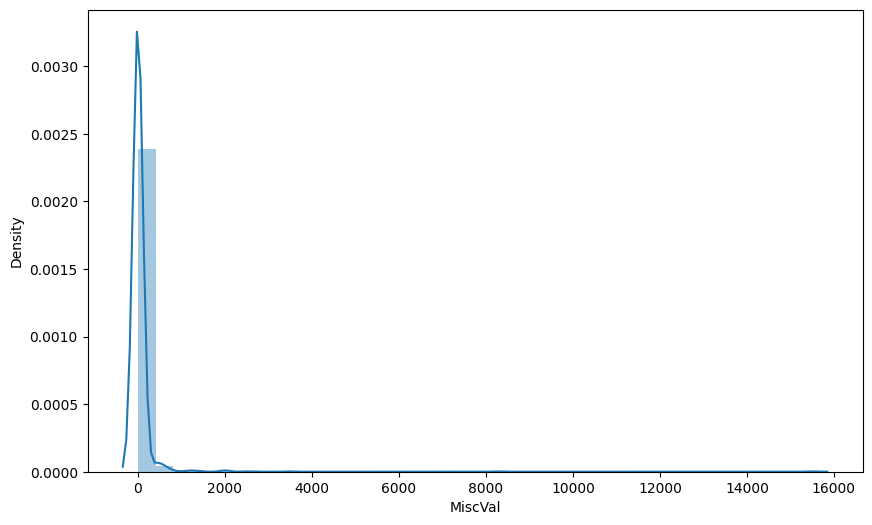

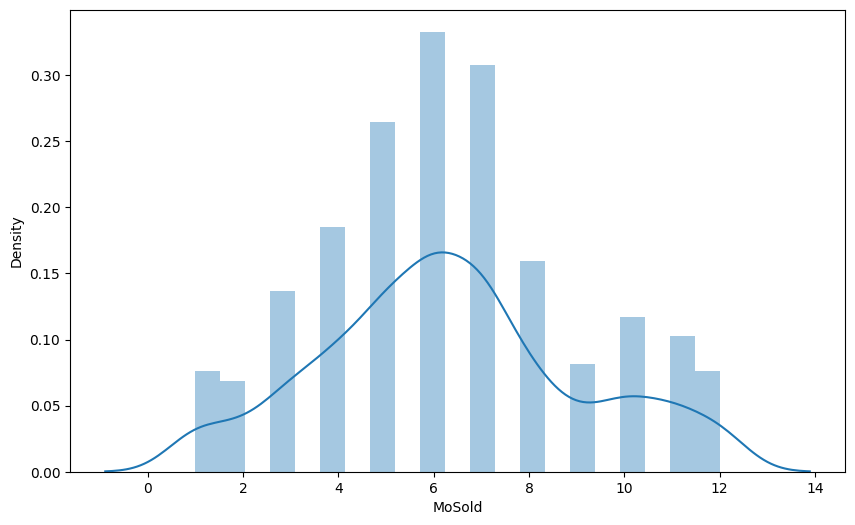

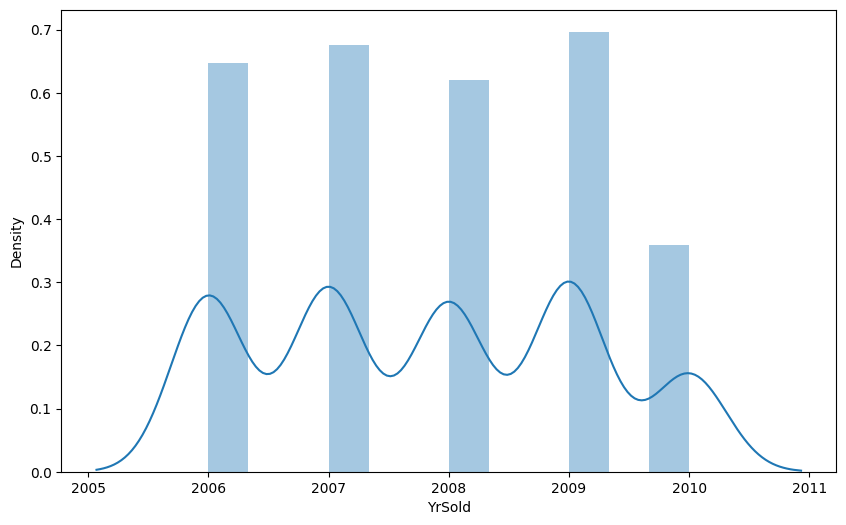

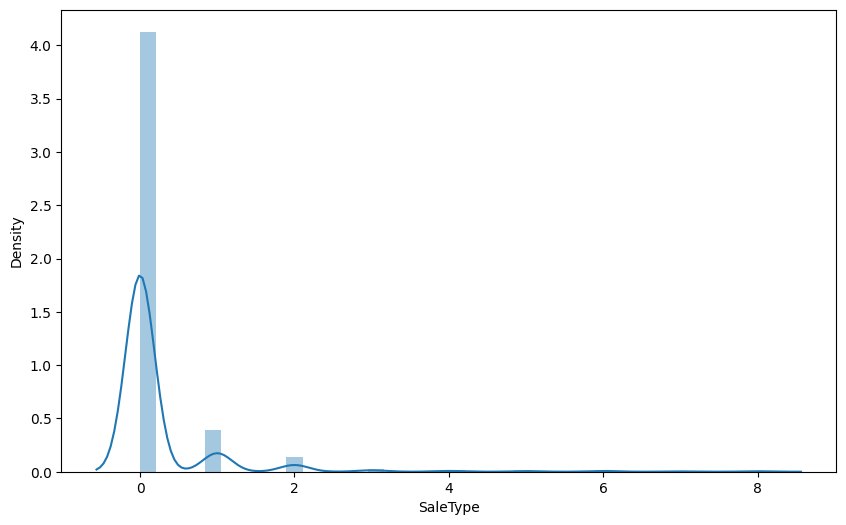

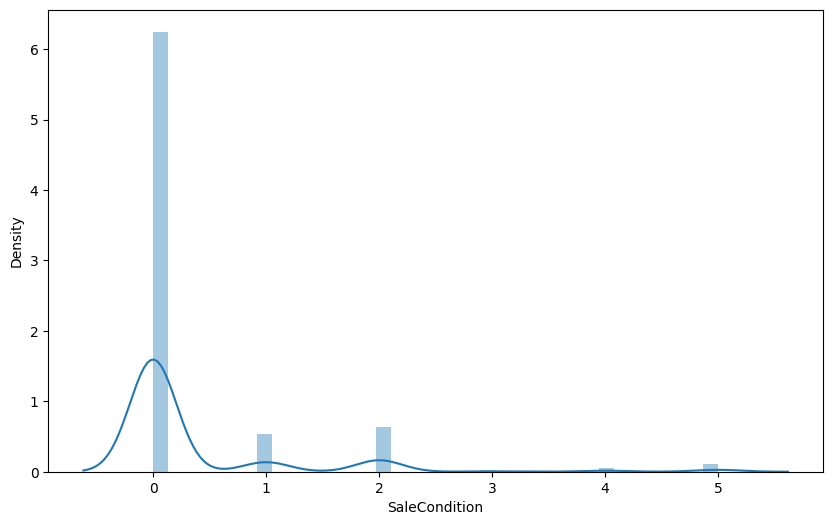

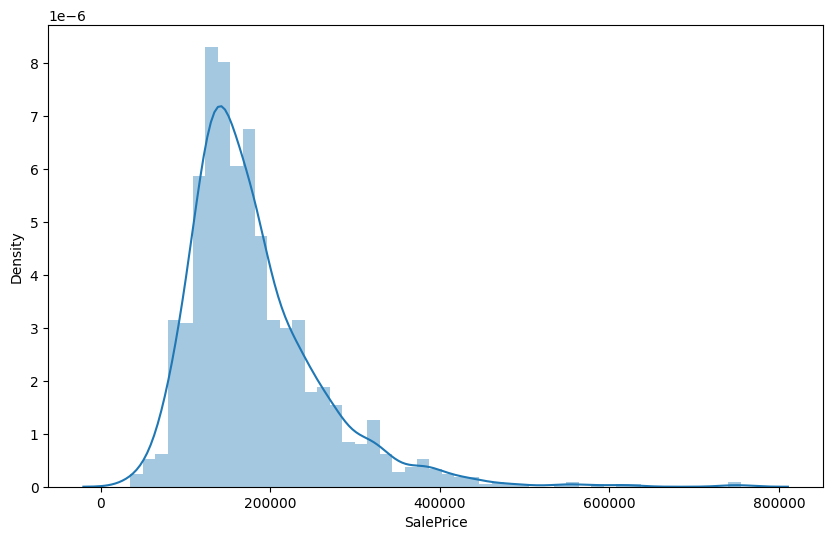

In [184]:

#check dist of all columns
for col in df_train.columns:
  plt.figure(figsize=(10,6))
  sns.distplot(df_train[col])
  plt.show()


In [188]:
#Splitting features
x = df_train.drop(['SalePrice'],axis=1)
y = df_train['SalePrice']

#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1160, 79)
(291, 79)
(1160,)
(291,)


In [189]:
#feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

#model selection
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
import lightgbm as lgbm
from sklearn.gaussian_process import GaussianProcessRegressor


lr = LinearRegression()
r = Ridge()
l = Lasso()
en = ElasticNet()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
adb = AdaBoostRegressor()
xgb = XGBRegressor()
knn = KNeighborsRegressor()
svr = SVR()
cat = CatBoostRegressor()
lgb =lgbm.LGBMRegressor()
gpr = GaussianProcessRegressor()

#Fittings
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [190]:
r.fit(x_train_scaled,y_train)

Ridge()

In [191]:
l.fit(x_train_scaled,y_train)

Lasso()

In [192]:
en.fit(x_train_scaled,y_train)

ElasticNet()

In [193]:
rf.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [194]:
gb.fit(x_train_scaled,y_train)

GradientBoostingRegressor()

In [195]:
adb.fit(x_train_scaled,y_train)

AdaBoostRegressor()

In [196]:
xgb.fit(x_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [197]:
knn.fit(x_train_scaled,y_train)

KNeighborsRegressor()

In [198]:
svr.fit(x_train_scaled,y_train)

SVR()

In [ ]:
cat.fit(x_train_scaled,y_train)

In [200]:
lgb.fit(x_train_scaled,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3180
[LightGBM] [Info] Number of data points in the train set: 1160, number of used features: 73
[LightGBM] [Info] Start training from score 180783.327586


LGBMRegressor()

In [201]:
gpr.fit(x_train_scaled,y_train)

GaussianProcessRegressor()

In [202]:
#preds
lrpred = lr.predict(x_test_scaled)
rpred = r.predict(x_test_scaled)
lpred = l.predict(x_test_scaled)
enpred = en.predict(x_test_scaled)
rfpred = rf.predict(x_test_scaled)
gbpred = gb.predict(x_test_scaled)
adbpred = adb.predict(x_test_scaled)
xgbpred = xgb.predict(x_test_scaled)
knnpred = knn.predict(x_test_scaled)
svrpred = svr.predict(x_test_scaled)
catpred = cat.predict(x_test_scaled)
lgbpred = lgb.predict(x_test_scaled)
gprpred = gpr.predict(x_test_scaled)

#Evaluations
from sklearn.metrics import r2_score,mean_absolute_error
lrr2 = r2_score(y_test,lrpred)
rr2 = r2_score(y_test,rpred)
lr2 = r2_score(y_test,lpred)
enr2 = r2_score(y_test,enpred)
rfr2 = r2_score(y_test,rfpred)
gbr2 = r2_score(y_test,gbpred)
adbr2 = r2_score(y_test,adbpred)
xgbr2 = r2_score(y_test,xgbpred)
knnr2 = r2_score(y_test,knnpred)
svrr2 = r2_score(y_test,svrpred)
catr2 = r2_score(y_test,catpred)
lgbr2 = r2_score(y_test,lgbpred)
gprr2 = r2_score(y_test,gprpred)

print('LINEAR REG ',lrr2)
print('RIDGE ',rr2)
print('LASSO ',lr2)
print('ELASTICNET',enr2)
print('RANDOM FOREST ',rfr2)
print('GB',gbr2)
print('ADABOOST',adbr2)
print('XGB',xgbr2)
print('KNN',knnr2)
print('SVR',svrr2)
print('CAT',catr2)
print('LIGHTGBM',lgbr2)
print('GUASSIAN PROCESS',gprr2)

LINEAR REG  0.855343333145856
RIDGE  0.8556471591510442
LASSO  0.8555547774240804
ELASTICNET 0.8592861679621817
RANDOM FOREST  0.9163461984210088
GB 0.9179287643017308
ADABOOST 0.8455761940235383
XGB 0.9250934389758666
KNN 0.7838105265793984
SVR -0.051130190712677104
CAT 0.9349741471855747
LIGHTGBM 0.9058251114845637
GUASSIAN PROCESS -5.701681123399089


SO CATBOOST REGRESSOR IS THE BEST PERFORMING MODEL ON THIS DATASET/